# Plotting Functions

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import re, os
import tikzplotlib

# plt.rcParams['figure.dpi'] = 200
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['figure.figsize'] = [4, 3.5]
# plt.rcParams['figure.subplot.left'] = 0
# plt.rcParams['figure.subplot.bottom'] = 0.2
# plt.rcParams['figure.subplot.right'] = 1
# plt.rcParams['figure.subplot.top'] = 0.85
methods_font = font_manager.FontProperties(family='Monospace', size=15)
MARKERS_LIST = [
    "x",
    "^",
    "s",
    "o",
    "d",
    "p",
    "2",
    "8",
    "+",
    "P",
    "v",
    "h",
]
COLOR_LIST = [
    # "red",
    # "blue",
    # "green",
    # "#F47F72",
    "#E11F25",
    # "#4C8BC0", # blue
    "#5175C6", # new blue
    # "#456B38", # green
    "#008080", # teal
    # "orange", # orange
    # "#FF8C00", # dark orange
    "#DBA800", # dark yellow
    "#F66F69", # Pink
    # "purple",
    "#77ac30", # light green
    "#C077BD", # light purple
    "brown",
    # "pink",
    "gray"
]

BAR_STYLE_LIST = ["\\\\", "...", "oo", "++", "x", "/", "+", "-", "o", "O", ".", "*"]
LINE_WIDTH=1.5

def export_legend(legend, filename="legend.pdf"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)
    return

def export_legend_for_labels(marker_list,
                             color_list,
                             label_list,
                             ncols=6,
                             bbox=(1, 1.1),
                             legend_font={"family" : "Monospace"},
                             output_file="legend.pdf",):
    # f = lambda m,c: plt.plot([],[],marker=m, color=c, fillstyle="none", linewidth=LINE_WIDTH)[0]
    f = lambda m,c: plt.plot([],[],marker=m, color=c, fillstyle="none",linewidth=0.5)[0]
    handles = [f(marker_list[i], color_list[i]) for i in range(len(label_list))]
    legend = plt.legend(handles,
                        label_list,
                        bbox_to_anchor=bbox,
                        # loc='best',
                        ncols=ncols,
                        framealpha=1,
                        frameon=False, 
                        prop=legend_font
                        )

    export_legend(legend, output_file)
    # plt.legend().remove()
    plt.show()
    return

def export_legend_for_bar(color_list,
                            label_list,
                            hatch_list=BAR_STYLE_LIST,
                            legend_font={"family" : "Times New Roman"},
                            output_file="legend_bar.pdf"):
    # f = lambda m,c: plt.plot([],[],marker=m, color=c, fillstyle="none", linewidth=LINE_WIDTH)[0]
    # f = lambda m,c: plt.bar([],[],hatcher=m, edgecolor=c, fill=False)[0]
    
    # print([i for i in range(len(label_list))])
    # handles = [f(hatch_list[i], color_list[i]) for i in range(len(label_list))]
    handles = [plt.Rectangle((0,0),1,1, color=color_list[i], hatch=hatch_list[i], fill=False) for i in range(len(label_list))]
    
    legend = plt.legend(handles,
                        label_list,
                        bbox_to_anchor=(1, 1.1),
                        # loc='best',
                        ncol=9,
                        framealpha=1,
                        frameon=False, 
                        prop=legend_font
                        )

    export_legend(legend, output_file)
    # plt.legend().remove()
    plt.show()
    return

def plot_lines(arr_2d, line_labels, x_axis,
               save_path=None,
               marker_list=MARKERS_LIST,
               color_list=COLOR_LIST,
               ms=5,
               x_logscale=False,
               y_logscale=False,
               **kwargs):
    assert len(line_labels) >= len(arr_2d)
    if "fig_size" in kwargs.keys():
        plt.figure(figsize=kwargs["fig_size"])    
    else:
        plt.figure(figsize=(4, 3))
    # plt.subplots_adjust(0,0,1,1)
    axes = plt.gca()
    plt.subplots_adjust(top=0.85, bottom=0.2, left=0.15)
    for i in range(len(arr_2d)):
        plt.plot(
            x_axis[:len(arr_2d[i])],
            arr_2d[i],
            marker=marker_list[i],
            color=color_list[i],
            fillstyle="none",
            linewidth=LINE_WIDTH,
            label=line_labels[i],
            markersize=ms
        )
    if x_logscale:
        if "x_logbase" in kwargs.keys():
            axes.set_xscale("log", base=kwargs["x_logbase"])
        else:
            axes.set_xscale("log")
    if y_logscale:
        if "y_logbase" in kwargs.keys():
            axes.set_yscale("log", base=kwargs["y_logbase"])
        else:
            axes.set_yscale("log")
    plt.xticks(x_axis)
    if "tick_size" in kwargs.keys():
        # axes.set_xticks(x_axis, fontsize=kwargs["tick_size"])
        # axes.set_yticks(fontsize=kwargs["tick_size"])
        axes.tick_params(labelsize=kwargs["tick_size"])
    if "x_ticks" in kwargs.keys():
        axes.set_xticks(kwargs["x_ticks"])
        if "x_ticklabels" in kwargs.keys():
            axes.set_xticklabels(kwargs["x_ticklabels"])
    if "y_ticks" in kwargs.keys():
        axes.set_yticks(kwargs["y_ticks"])
        if "y_ticklabels" in kwargs.keys():
            axes.set_yticklabels(kwargs["y_ticklabels"])
    if "minor_ticks" in kwargs.keys() and kwargs["minor_ticks"] == False:
        axes.minorticks_off()
    if "x_label" in kwargs.keys():
        plt.xlabel(kwargs["x_label"],
                   fontstyle="italic",
                   fontsize=13)
    if "y_label" in kwargs.keys():
        plt.ylabel(kwargs["y_label"],
                   fontsize=13,
                   fontstyle="italic",
                   labelpad=20,
                   rotation=0,
                   ha='left', va='center'
                   )
        axes.yaxis.set_label_coords(-0.2, 1.1)
    
    if "y_label_pos" in kwargs.keys():
        axes.yaxis.set_label_coords(kwargs["y_label_pos"][0], kwargs["y_label_pos"][1])
    
    if "label_size" in kwargs.keys():
        axes.yaxis.label.set_size(kwargs["label_size"])
        axes.xaxis.label.set_size(kwargs["label_size"])
            
    if "y_lim" in kwargs.keys():
        axes.set_ylim(kwargs["y_lim"])
        
    if "title" in kwargs.keys():
        plt.title(kwargs["title"])
    axes.tick_params(which="both", direction="in")
    if "tick_pad" in kwargs.keys():
        axes.tick_params(pad=kwargs["tick_pad"])
    if "display_legend" in kwargs.keys() and kwargs["display_legend"]:
        plt.legend()
    if "lw" in kwargs.keys():
        plt.setp(axes.lines, linewidth=kwargs["lw"])
        
    # plt.tight_layout()
    if save_path != None:
        dir = os.path.split(save_path)[0]
        os.makedirs(dir, exist_ok=True)
        tikzplotlib.save(save_path.replace(".pdf", ".tex"))
        plt.savefig(save_path)
    plt.show()
    return

def plot_stacked_bar(data, x_axis, labels,
                     color_list=COLOR_LIST,
                     save_path=None,
                     **kwargs):
    assert(len(data) == len(x_axis))
    if "fig_size" in kwargs.keys():
        plt.figure(figsize=kwargs["fig_size"])    
    else:
        plt.figure(figsize=(4, 3))
    width = 0.5
    if "bar_width" in kwargs.keys():
        width = kwargs["bar_width"]
    axes = plt.gca()
    plt.subplots_adjust(top=0.85, bottom=0.2)
    data = np.array(data).T
    bottom = np.zeros(len(x_axis))
    for i in range(len(data)):
        p = axes.bar(x_axis, data[i], width, label=labels[i],
                     edgecolor=color_list[i],
                     fill=False,
                     bottom=bottom,
                     hatch=BAR_STYLE_LIST[i])
        bottom += data[i]
    
    if "tick_size" in kwargs.keys():
        axes.tick_params(labelsize=kwargs["tick_size"])
    if "x_ticks" in kwargs.keys():
        axes.set_xticks(kwargs["x_ticks"])
        if "x_ticklabels" in kwargs.keys():
            axes.set_xticklabels(kwargs["x_ticklabels"])
    if "y_ticks" in kwargs.keys():
        axes.set_yticks(kwargs["y_ticks"])
        if "y_ticklabels" in kwargs.keys():
            axes.set_yticklabels(kwargs["y_ticklabels"])
    
        
    # for tick in axes.get_xticklabels():
    #     tick.set_fontproperties(methods_font)
    if "x_label" in kwargs.keys():
        plt.xlabel(kwargs["x_label"],
                   fontstyle="italic",
                   fontsize=13)
    if "y_label" in kwargs.keys():
        plt.ylabel(kwargs["y_label"],
                   fontsize=13,
                   fontstyle="italic",
                   labelpad=20,
                   rotation=0,
                   ha='left', va='center'
                   )
        axes.yaxis.set_label_coords(-0.2, 1.1)
    
    if "y_label_pos" in kwargs.keys():
        axes.yaxis.set_label_coords(kwargs["y_label_pos"][0], kwargs["y_label_pos"][1])
    
    if "label_size" in kwargs.keys():
        axes.yaxis.label.set_size(kwargs["label_size"])
        axes.xaxis.label.set_size(kwargs["label_size"])
            
    if "y_lim" in kwargs.keys():
        axes.set_ylim(kwargs["y_lim"])
        
    if "title" in kwargs.keys():
        plt.title(kwargs["title"])
    axes.tick_params(which="both", direction="in")
    
    if "x_logscale" in kwargs.keys() and kwargs["x_logscale"]:
        if "x_logbase" in kwargs.keys():
            axes.set_xscale("log", base=kwargs["x_logbase"])
        else:
            axes.set_xscale("log")
    if "y_logscale" in kwargs.keys() and kwargs["y_logscale"]:
        if "y_logbase" in kwargs.keys():
            axes.set_yscale("log", base=kwargs["y_logbase"])
        else:
            axes.set_yscale("log")
    if "minor_ticks" in kwargs.keys() and kwargs["minor_ticks"] == False:
        axes.minorticks_off()
    if save_path != None:
        dir = os.path.split(save_path)[0]
        os.makedirs(dir, exist_ok=True)
        plt.savefig(save_path)
    plt.show()
    
MARKER_SIZE=15
LABEL_SIZE=22
Y_LABEL_POS=[0, 1.1]
TICK_SIZE=20
FIG_SIZE=[3.8, 3.4]
DS_STR_LIST = ["Epinions", "Stanford", "DBLP", "Orkut", "LiveJournal", "Twitter"]

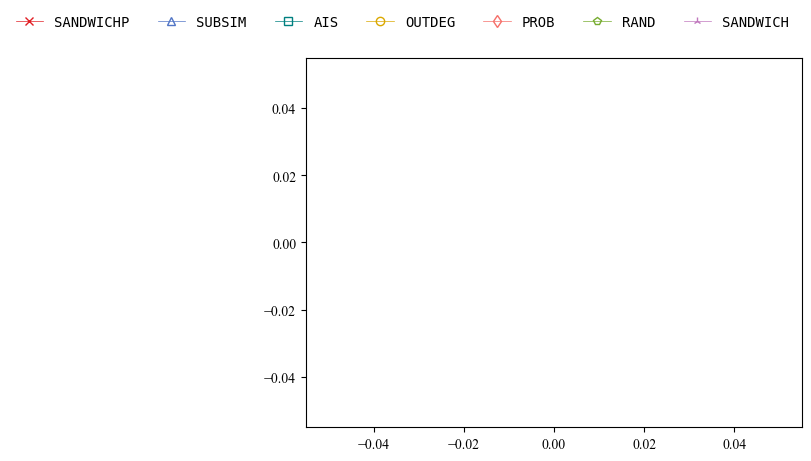

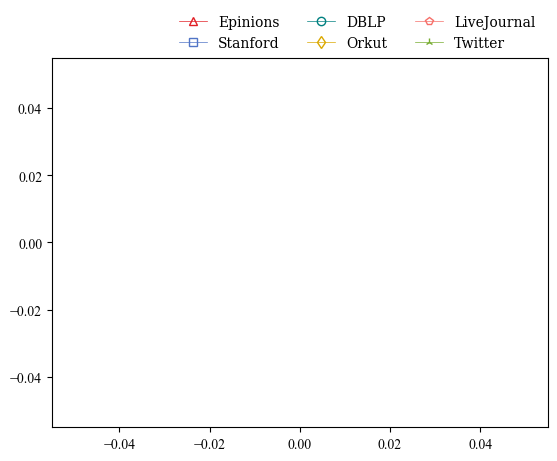

In [118]:
export_legend_for_labels(MARKERS_LIST, COLOR_LIST, label_list=["SANDWICHP", "SUBSIM", "AIS", "OUTDEG", "PROB", "RAND", "SANDWICH",], ncols=7,
                         bbox=(1, 1.15),
                         output_file="./figs/legend_1.pdf")
export_legend_for_labels(MARKERS_LIST[1:], COLOR_LIST, label_list=DS_STR_LIST, ncols=3, bbox=(1, 1.15), output_file="./figs/ds_legend.pdf", legend_font={"family" : "serif"})

In [119]:
linestyles = ["solid", "dotted", "dashed", "dashdot", (0, (3, 5, 1, 5)), (5, (10, 3))]
seed_dist_list = ["Uniform", r"Beta - $\mu=0.1$", r"Beta - $\mu=0.3$", r"Beta - $\mu=0.5$", r"Beta - $\mu=0.7$", r"Beta - $\mu=0.9$"]
def export_legend_for_ls(ls_list,
                         label_list,
                        ncols=6,
                        bbox=(1, 1.1),
                        legend_font={"family" : "Monospace"},
                        output_file="legend.pdf",):
    f = lambda ls: plt.plot([],[],ls=ls, fillstyle="none")[0]
    
    handles = [f(linestyles[i]) for i in range(len(label_list))]
    legend = plt.legend(handles,
                        label_list,
                        bbox_to_anchor=bbox,
                        # loc='best',
                        ncols=ncols,
                        framealpha=1,
                        frameon=False, 
                        prop=legend_font
                        )

    export_legend(legend, output_file)
    # plt.legend().remove()
    plt.show()

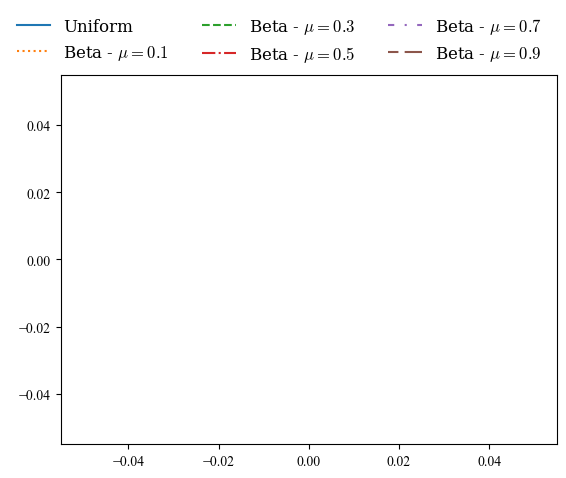

In [120]:
export_legend_for_ls(linestyles, seed_dist_list, ncols=3, bbox=(1, 1.2), output_file="./figs/legend_dist.pdf", legend_font={"family" : "serif", "size": 12})

# Data Processing Functions

In [121]:
BASELINE_NAMES = ["RAND", "OUTDEG", "PROB", "SINF", "UINF", "AIS-U" , "IMA"]
DATASET_LIST = ["Epinions", "stanford", "DBLP", "orkut", "LJ", "twitter"]
NUM_RR = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200, 102400])
RAND_SEEDS = [2021, 2022, 2023, 2024, 2025, 2026]
K_LIST = [5, 10] + list(range(20, 101, 20))
EPS_LIST = [0.1, 0.2, 0.3, 0.4, 0.5]
GAMMA_LIST = [0.05, 0.1, 0.15, 0.2]
rand_seeds_nethept = [42, 2020, 2022, 2023, 2024]
TIME_LABELS = ["RR sets", "Sampling Stage 2", "Selection"]
EVAL_DIR = "./result/evaluation/"
LOG_DIR = "./result/info/"

# def get_inf_from_csv(filepath):
#     df = pd.read_csv(filepath)
#     return float(df["expected spread"].iloc[-1])
def get_num_from_file(filepath):
    with open(filepath, 'r') as f:
        return float(f.read())

def get_res_from_file(file_path, mode="result")->float:
    with open(file_path, 'r') as file:
        match = None
        for line in file:
            if mode == "result" and line.startswith('Result by'):
                match = re.search(r'\d+(\.\d+)?', line)
            elif mode == "origin" and line.startswith("Original Inf:"):
                match = re.search(r'\d+(\.\d+)?', line)
            
        if match:
            number = float(match.group())
            return number
        else:
            print("RESULT NOT FOUND", file_path)

def get_RRset_generation_time(file_path):
    with open(file_path, "r") as file:
        contents = file.read()

        # Use regular expressions to extract the RR set generation time
        pattern = r"->Time used \(sec\) for operation \[RR set generation\]: (\d+\.\d+|\d+)"
        match = re.search(pattern, contents)

        if match:
            rr_set_time = float(match.group(1))
            return rr_set_time
        else:
            print("RR set generation time not found")
            return -1.0

def get_process_time(file_path):
    with open(file_path, "r") as file:
        # Read the contents of the file
        contents = file.read()

        # Use regular expressions to find the line with the keyword "process"
        pattern = r".*process.*"
        match = re.search(pattern, contents, re.MULTILINE)

        if match:
            line = match.group(0)
            # Use regular expressions to extract the Running Time from the line
            time_pattern = r"\d+(\.\d+)?"
            time_match = re.search(time_pattern, line)
            if time_match:
                running_time = float(time_match.group(0))
                return running_time
            else:
                print("Running Time not found in the line with the keyword 'process'")
        else:
            print("Line with the keyword 'process' not found")

def get_original_inf(dataset_name:str, rand_seeds):
    res_arr = []
    for rand_seed in rand_seeds:
        path = f"./data/{dataset_name}/params/5_0_0.500000_0.001000_{rand_seed}_WC/log_IMA.txt"
        res_arr.append(get_res_from_file(path, "origin"))
    return sum(res_arr) / len(res_arr)

def get_inf_k_of_one_dataset(dataset_name:str, rand_seeds, k_list=K_LIST, baseline_names=["IM-N"], settings:dict={"eps":0.1, "prob_mode":"wc"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    # s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"

    for baseline in baseline_names:
        inf_diff_rand_seed_list = []
        for rand_seed in rand_seeds:
            inf_for_one_rand_seed = []
            s_rand_seed = rand_seed
            for k_seed in k_list:
                try:
                    if baseline in ["MCG", "MIA", "OUTDEG", "RAND"]:
                        s_eps = "0.000000"
                        if baseline == "MIA" or baseline == "OUTDEG":
                            s_rand_seed = 0
                    else:
                        s_eps = format(settings["eps"], '.6f')
                    path = os.path.join(EVAL_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_seed}_{s_eps}_{prob_mode}")
                    # print(path)
                    inf_for_one_rand_seed.append(get_num_from_file(path))
                except:
                    print(baseline, rand_seed, k_seed)
                    print(path)
            inf_diff_rand_seed_list.append(inf_for_one_rand_seed)
        res[baseline] = np.mean(np.array(inf_diff_rand_seed_list), axis=0)
    return res


def get_eps_inf_of_one_dataset(dataset_name:str, rand_seeds, baseline_names=["IMA"], k_edges=50):
    res = {}
    
    for baseline in baseline_names:
        inf_diff_rand_seed_list = []
        for rand_seed in rand_seeds:
            inf_for_one_rand_seed = []
            for eps in EPS_LIST:
                try:
                    path = f"./data/{dataset_name}/params/{k_edges}_0_{eps}00000_0.001000_{rand_seed}_WC/log_{baseline}.txt"
                    # print(path)
                    inf_for_one_rand_seed.append(get_res_from_file(path, "result"))
                except:
                    print(path)
            inf_diff_rand_seed_list.append(inf_for_one_rand_seed)
        x_mean = np.mean(np.array(inf_diff_rand_seed_list), axis=0)
        res[baseline] = x_mean / np.max(x_mean)
    return res

def get_eps_time_of_one_dataset(dataset_name:str, rand_seeds, baseline_names=["IMA"]):
    res = {}
    for baseline in baseline_names:
        time_diff_rand_seed_list = []
        for rand_seed in rand_seeds:
            time_for_one_rand_seed = []
            for eps in EPS_LIST:
                try:
                    working_folder = f"./data/{dataset_name}/params/50_0_{eps}00000_0.001000_{rand_seed}_WC/"
                    log_path = os.path.join(working_folder, "logs.txt")
                    log_baseline_path = os.path.join(working_folder, f"log_{baseline}.txt")
                    RR_set_gen_time = get_RRset_generation_time(log_path)
                    process_time = get_process_time(log_baseline_path)
                    time_for_one_rand_seed.append(RR_set_gen_time + process_time)
                except Exception as e:
                    print(e.args)
                    print(working_folder)
            time_diff_rand_seed_list.append(time_for_one_rand_seed)
        res[baseline] = np.mean(np.array(time_diff_rand_seed_list), axis=0)
    return res

def read_time_from_file(info_file):
    # Extract time from the file
    # Approx.: -1
    # Time (sec): 13.2064
    # Sampling Time (sec): -1
    # Selection Time (sec): -1
    # Influence: -1
    # Self-estimated influence: 103.707
    # # Seeds: 5
    # # RR sets: 0
    
    with open(info_file, 'r') as f:
        contents = f.read()
        # regular expression pattern for integer or floating
        pattern = r"Time \(sec\): (-?\d+(.\d+)?)"
        match = re.search(pattern, contents)
        return float(match.group(1))


def get_runtime_of_one_dataset(dataset_name:str, rand_seeds, baseline_names=["IM-N"], k_list=K_LIST,
                               settings={"eps":0.1, "prob_mode":"wc", "q":0.8}):
    res = {}
    eps = settings["eps"] if "eps" in settings.keys() else 0.1
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    q = settings["q"] if "q" in settings.keys() else 0.8
    s_q = format(q, '.6f')
    for baseline in baseline_names:
        time_diff_rand_seed_list = []
        for rand_seed in rand_seeds:
            time_for_one_rand_seed = []
            for k_seed in k_list:
                try:
                    s_rand_seed = rand_seed
                    if baseline in ["MCG", "MIA", "OUTDEG", "RAND"]:
                        s_eps = "0.000000"
                        if baseline == "MIA" or baseline == "OUTDEG":
                            s_rand_seed = 0
                    else:
                        s_eps = format(eps, '.6f')
                    if baseline in ["subsim", "OUTDEG", "RAND"]:
                        path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_seed}_{s_eps}_{prob_mode}")
                    else:
                        path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_seed}_{s_eps}_{prob_mode}_q{s_q}")
                    time_for_one_rand_seed.append(read_time_from_file(path))
                except Exception as e:
                    print(e.args)
                    print(path)
            time_diff_rand_seed_list.append(time_for_one_rand_seed)
        res[baseline] = np.mean(np.array(time_diff_rand_seed_list), axis=0)
    return res


def display_for_tex(method_inf_dict, method="IMA", k_list = [0, 5, 10, 20, 30, 40, 50]):
    for i in range(len(method_inf_dict[method])):
        print(f"({k_list[i]},{round(method_inf_dict[method][i], 4)})")

def display_for_tex_all(method_inf_dict, k_list = [0, 5, 10, 20, 30, 40, 50]):
    for method in method_inf_dict.keys():
        print(method + ":")
        display_for_tex(method_inf_dict, method, k_list)
        
def get_inf_numRRsets_of_one_dataset(dataset_name:str, rand_seeds, baseline_names=["IMA"],
                                     settings={"seed_mode":"RAND", "k_edges":100}):
    res = {}
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    k_edges = settings["k_edges"] if "k_edges" in settings.keys() else 50
    for baseline in baseline_names:
        inf_diff_rand_seed_list = []
        for rand_seed in rand_seeds:
            inf_for_one_rand_seed = []
            for num_samples in NUM_RR:
                try:
                    if seed_mode != "IM":
                        path = f"./data/{dataset_name}/params/{k_edges}_0_0.000000_0.001000_{rand_seed}_{seed_mode}seed_WC_numsamples_{num_samples}/k_inf_spread_{baseline}.csv"
                    else:
                        path = f"./data/{dataset_name}/params/{k_edges}_0_0.000000_0.001000_{rand_seed}_WC_numsamples_{num_samples}/k_inf_spread_{baseline}.csv"
                    # print(path)
                    inf_for_one_rand_seed.append(get_inf_from_csv(path))
                except:
                    print(baseline, rand_seed)
                    print(path)
            inf_diff_rand_seed_list.append(inf_for_one_rand_seed)
        res[baseline] = np.mean(np.array(inf_diff_rand_seed_list), axis=0)
    return res

def get_sep_runtime_one_file(filepath, mode="sep"):
    # Regular expressions to match the time values
    # sampling_time_pattern = r"Sampling Time \(sec\): (\d+\.*\d*)"
    # selection_time_pattern = r"Selection Time \(sec\):\s*(\d+\.\d+e[+-]?\d+)"
    sampling_time_pattern = r"Sampling Time \(sec\): (-?\d+(.\d+)?([eE][+-]?\d+)?)"
    selection_time_pattern = r"Selection Time \(sec\): (-?\d+(.\d+)?([eE][+-]?\d+)?)"
    if "MCGreedy" in filepath:
        # Regular expressions to match the time values for --->Time used (sec) for process [MCGreedy_../data/GRQC/]: 1199.85
        # Define the pattern to match the time (float or integer)
        pattern = r'\d+\.?\d*'
        
        with open(filepath, 'r') as f:
            file_content = f.read()
            time_values = [float(re.findall(pattern, file_content)[0])]
        return time_values
    # Extracting the time values
    with open(filepath, 'r') as f:
        file_content = f.read()
        sampling_time = re.search(sampling_time_pattern, file_content).group(1)
        # sampling_phase_2_time = re.search(sampling_phase_2_time_pattern, file_content).group(1)
        selection_time = re.search(selection_time_pattern, file_content).group(1)

    # Storing the time values in a list
    if mode == "sep":
        time_values = [float(sampling_time), float(selection_time)]
    elif mode == "sample_select":
        time_values = [float(sampling_time), float(selection_time)]
    elif mode == "no_RR":
        time_values = [float(selection_time)]
    return time_values


def get_runtime_k_for_bar_of_one_dataset(dataset_name:str, rand_seeds, k_list, mode="sep", settings:dict={"eps":0.1, "method": "IM-Np", "q":0.8}):
    res = []
    s_eps = format(settings["eps"], '.6f')
    method = settings["method"] if "method" in settings.keys() else "IM-Np"
    # num_samples = settings["num_samples"] if "num_samples" in settings.keys() else 0
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"

    # if num_samples > 0:
    #     s_eps = "0.000000"
    for k in k_list:
        time_diff_rand_seed_list = []
        for rand_seed in rand_seeds:
            try:
                s_rand_seed = rand_seed
                if method in ["MCG", "MIA", "OUTDEG", "RAND"]:
                    s_eps = "0.000000"
                    if method == "MIA" or method == "OUTDEG":
                        s_rand_seed = 0
                
                path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{method}_k{k}_{s_eps}_{prob_mode}")
                time_for_one_rand_seed = get_sep_runtime_one_file(path, mode)
            except:
                print(method, rand_seed, k)
                print(path)
            time_diff_rand_seed_list.append(time_for_one_rand_seed)
        res.append(np.mean(np.array(time_diff_rand_seed_list), axis=0))
    return res

def get_runtime_for_lines_of_one_dataset(dataset_name:str, rand_seeds, baseline_names=["SANDWICH"], k_list=K_LIST, settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    method = settings["method"] if "method" in settings.keys() else "IM-Np"
    # num_samples = settings["num_samples"] if "num_samples" in settings.keys() else 0
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    num_samples = settings["num_samples"] if "num_samples" in settings.keys() else 0
    k_edges = settings["k_edges"] if "k_edges" in settings.keys() else 50
    if num_samples > 0:
        s_eps = "0.000000"
        
    for baseline in baseline_names:
        time_diff_rand_seed_list = []
        if baseline in ["OUTDEG", "RAND"]:
            s_eps = "0.000000"
        for rand_seed in rand_seeds:
            time_for_one_rand_seed = []
            if baseline == "OUTDEG":
                rand_seed = 0
            for k in k_list:
                try:
                    path = os.path.join(LOG_DIR, f"{dataset_name}_{rand_seed}_{baseline}_k{k}_{s_eps}_{prob_mode}")
                    time_for_one_rand_seed.append(read_time_from_file(path))
                except Exception as e:
                    print(e)
                    print(baseline, rand_seed, k_edges)
                    print(path)
                time_diff_rand_seed_list.append(time_for_one_rand_seed)
        res[baseline] = np.mean(np.array(time_diff_rand_seed_list), axis=0)
    return res

def convert_dict_to_arr(method_data_dict:dict, method_list):
    res = []
    max_len = 0
    for method in method_list:
        max_len = max(max_len, len(method_data_dict[method]))
    for method in method_list:
        num_elements_to_pad = max_len - len(method_data_dict[method])
        res.append(np.pad(method_data_dict[method], (0, num_elements_to_pad), mode='constant', constant_values=np.nan))
    return np.array(res)

def get_inf_eps_of_one_dataset(dataset_name:str, rand_seeds, eps_list=[0.1, 0.2, 0.3], baseline_names=["AIS"], settings:dict={"k_edges":100, "seed_mode":"RAND"}):
    res = {}
    
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    num_samples = settings["num_samples"] if "num_samples" in settings.keys() else 0
    k = settings["k_edges"] if "k_edges" in settings.keys() else 50
    if num_samples > 0:
        s_eps = "0.000000"
    for baseline in baseline_names:
        inf_diff_rand_seed_list = []
        for rand_seed in rand_seeds:
            inf_for_one_rand_seed = []
            for eps in eps_list:
                try:
                    s_eps = format(eps, '.6f')
                    dir_name = f"./data/{dataset_name}/params/{k}_0_{s_eps}_0.001000_{rand_seed}_WC"
                    if seed_mode != "IM":
                        dir_name = f"./data/{dataset_name}/params/{k}_0_{s_eps}_0.001000_{rand_seed}_{seed_mode}seed_WC"
                    if num_samples != 0:
                        dir_name = dir_name + f"_numsamples_{num_samples}"
                    path = os.path.join(dir_name, f"k_inf_spread_{baseline}.csv")
                    # print(path)
                    inf_for_one_rand_seed.append(get_inf_from_csv(path))
                except:
                    print(baseline, rand_seed, k)
                    print(path)
            inf_diff_rand_seed_list.append(inf_for_one_rand_seed)
        res[baseline] = np.mean(np.array(inf_diff_rand_seed_list), axis=0)
    return res

In [122]:
"subsim/result/evaluation/twitter_9_SANDWICH_k100_0.300000_gamma0.050000_wc_seedsIM50_uniRAND_candEdgesorig"
method_list = ["SANDWICHP", "SUBSIM", "AIS", "OUTDEG", "PROB", "RAND", "SANDWICH"]

# Varying $k$
## Influence - k

In [123]:
# Data process functions
def get_inf_k_of_one_dataset(dataset_name:str, rand_seeds, k_list=K_LIST, baseline_names=["SANDWICH"],
                             settings:dict={"eps":0.1,
                                            "prob_mode":"wc",
                                            "gamma":0.05,
                                            "cand_edge_prob":"orig",
                                            "seed_mode":"IM",
                                            "k_seed":50,
                                            "seed_dist":"uniRAND"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50

    for baseline in baseline_names:
        inf_diff_rand_seed_list = []
        
        s_eps = format(settings["eps"], '.6f') if "eps" in settings.keys() else "0.100000"
        s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
        for rand_seed in rand_seeds:
            inf_for_one_rand_seed = []
            s_rand_seed = rand_seed
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0
                    
            for k_edge in k_list:
                try:
                    path = os.path.join(EVAL_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                    # print(path)
                    inf_for_one_rand_seed.append(get_num_from_file(path))
                except:
                    print(baseline, rand_seed, k_edge)
                    print(path)
            inf_diff_rand_seed_list.append(inf_for_one_rand_seed)
        res[baseline] = np.mean(np.array(inf_diff_rand_seed_list), axis=0)
    return res

def get_origin_inf(dataset_name:str,
                  settings:dict={"eps":0.1,
                               "prob_mode":"wc",
                               "gamma":0.05,
                               "cand_edge_prob":"orig",
                               "seed_mode":"IM",
                               "k_seed":50,
                               "seed_dist":"uniRAND"}):
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    path = os.path.join(EVAL_DIR, f"{dataset_name}_0_OUTDEG_k0_0.000000_gamma0.000000_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
    origin_inf = get_num_from_file(path)
    return origin_inf

settings_default = {"eps":0.1,
                    "prob_mode":"wc",
                    "gamma":0.05,
                    "cand_edge_prob":"orig",
                    "seed_mode":"IM",
                    "k_seed":50,
                    "seed_dist":"uniRAND"}
method_list = ["SANDWICHP", "SUBSIM", "AIS", "OUTDEG", "PROB", "RAND", "SANDWICH"]

In [124]:

inf_k_epin_dict = get_inf_k_of_one_dataset("Epinions", list(range(1, 11)), K_LIST, method_list, settings_default)
inf_k_epin_arr = np.array(list(inf_k_epin_dict.values())) - get_origin_inf("Epinions", settings_default)

inf_k_DBLP_dict = get_inf_k_of_one_dataset("DBLP", list(range(1, 11)), K_LIST, method_list, settings_default)
inf_k_DBLP_arr = np.array(list(inf_k_DBLP_dict.values())) - get_origin_inf("DBLP", settings_default)

inf_k_stanford_dict = get_inf_k_of_one_dataset("stanford", list(range(1, 11)), K_LIST, method_list, settings_default)
inf_k_stanford_arr = np.array(list(inf_k_stanford_dict.values())) - get_origin_inf("stanford", settings_default)

inf_k_orkut_dict = get_inf_k_of_one_dataset("orkut", list(range(1, 11)), K_LIST, method_list, settings_default)
inf_k_orkut_arr = np.array(list(inf_k_orkut_dict.values())) - get_origin_inf("orkut", settings_default)

inf_k_LJ_dict = get_inf_k_of_one_dataset("LJ", list(range(1, 11)), K_LIST, method_list, settings_default)
inf_k_LJ_arr = np.array(list(inf_k_LJ_dict.values())) - get_origin_inf("LJ", settings_default)

inf_k_twitter_dict = get_inf_k_of_one_dataset("twitter", list(range(1, 11)), K_LIST, method_list, settings_default)
inf_k_twitter_arr = np.array(list(inf_k_twitter_dict.values())) - get_origin_inf("twitter", settings_default)

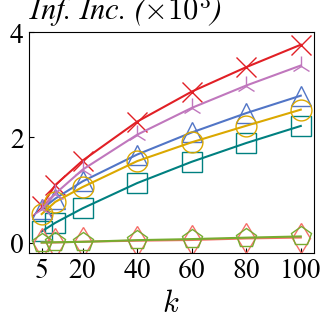

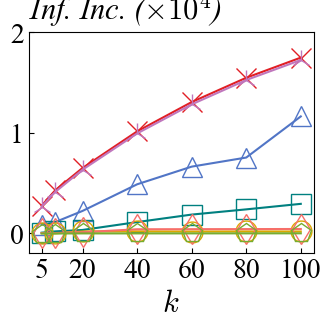

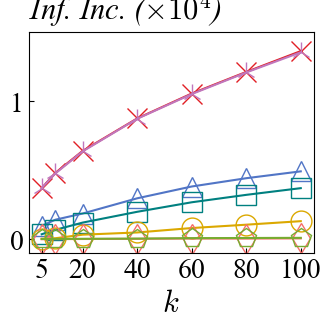

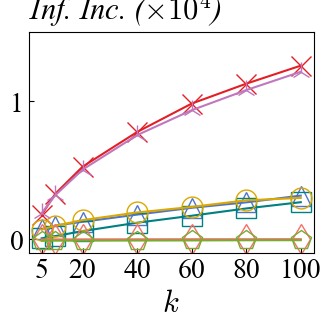

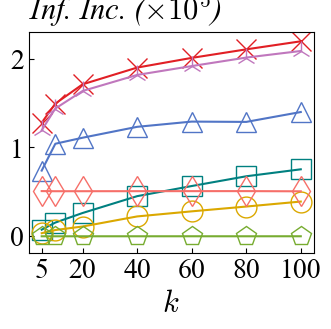

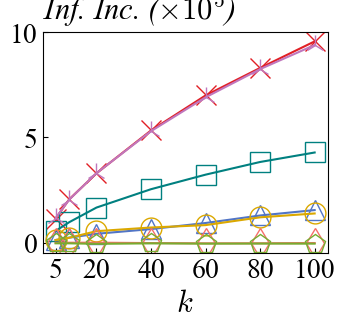

In [125]:
plot_lines(inf_k_epin_arr / 1000,
           line_labels=method_list,
           x_axis=K_LIST,
           x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Inf. Inc. ($\times 10^3$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.2, 4],
           save_path="./figs/inf_k_Epinions.pdf"
           )

plot_lines(inf_k_DBLP_arr / 10000,
           line_labels=method_list,
           x_axis=K_LIST,
           x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.2, 2],
           save_path="./figs/inf_k_DBLP.pdf"
           )

plot_lines(inf_k_stanford_arr / 10000,
           line_labels=method_list,
           x_axis=K_LIST,
           x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.1, 1.5],
           save_path="./figs/inf_k_stanford.pdf"
           )

plot_lines(inf_k_LJ_arr / 10000,
           line_labels=method_list,
           x_axis=K_LIST,
           x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.1, 1.5],
           save_path="./figs/inf_k_LJ.pdf"
           )

plot_lines(inf_k_orkut_arr / 100000,
           line_labels=method_list,
           x_axis=K_LIST,
           x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Inf. Inc. ($\times 10^5$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.2, 2.3],
           save_path="./figs/inf_k_orkut.pdf"
           )

plot_lines(inf_k_twitter_arr / 100000,
           line_labels=method_list,
           x_axis=K_LIST,
           x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Inf. Inc. ($\times 10^5$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.5, 10],
           save_path="./figs/inf_k_twitter.pdf"
           )

## Runtime - k

In [126]:
def get_runtime_k_of_one_dataset(dataset_name:str, rand_seeds, baseline_names=["SANDWICH"], k_list=K_LIST, settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
        
    for baseline in baseline_names:
        time_diff_rand_seed_list = []
        
        s_eps = format(settings["eps"], '.6f') if "eps" in settings.keys() else "0.100000"
        s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
        for rand_seed in rand_seeds:
            s_rand_seed = rand_seed
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0
                
            time_for_one_rand_seed = []
            if baseline == "OUTDEG":
                rand_seed = 0
            for k_edges in k_list:
                try:
                    path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edges}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                    time_for_one_rand_seed.append(read_time_from_file(path))
                except Exception as e:
                    print(e)
                    print(baseline, rand_seed, k_edges)
                    print(path)
                time_diff_rand_seed_list.append(time_for_one_rand_seed)
        res[baseline] = np.mean(np.array(time_diff_rand_seed_list), axis=0)
    return res

def combine_for_datasets(dataset_list, dataset_time_k_dict, target_method="SANDWICH"):
    res = {}
    for dataset_name in dataset_list:
        res[dataset_name] = dataset_time_k_dict[dataset_name][target_method]
    return res

In [127]:
settings_default = {"eps":0.1,
                    "prob_mode":"wc",
                    "gamma":0.05,
                    "cand_edge_prob":"orig",
                    "seed_mode":"IM",
                    "k_seed":50,
                    "seed_dist":"uniRAND"}
method_list = ["SANDWICHP", "SUBSIM", "AIS", "OUTDEG", "PROB", "RAND", "SANDWICH"]

time_k_Epinions_dict = get_runtime_k_of_one_dataset("Epinions", list(range(1, 11)), method_list, K_LIST, settings_default)
# time_k_Epinions_arr = convert_dict_to_arr(time_k_Epinions_dict, ["SANDWICH", "SUBSIM", "AIS"])

time_k_DBLP_dict = get_runtime_k_of_one_dataset("DBLP", list(range(1, 11)), method_list, K_LIST, settings_default)
# time_k_DBLP_arr = convert_dict_to_arr(time_k_DBLP_dict, ["SANDWICH", "SUBSIM", "AIS"])

time_k_stanford_dict = get_runtime_k_of_one_dataset("stanford", list(range(1, 11)), method_list, K_LIST, settings_default)
# time_k_stanford_arr = convert_dict_to_arr(time_k_stanford_dict, ["SANDWICH", "SUBSIM", "AIS"])

time_k_orkut_dict = get_runtime_k_of_one_dataset("orkut", list(range(1, 11)), method_list, K_LIST, settings_default)
# time_k_orkut_arr = convert_dict_to_arr(time_k_orkut_dict, ["SANDWICH", "SUBSIM", "AIS"])

time_k_LJ_dict = get_runtime_k_of_one_dataset("LJ", list(range(1, 11)), method_list, K_LIST, settings_default)
# time_k_LJ_arr = convert_dict_to_arr(time_k_LJ_dict, ["SANDWICH", "SUBSIM", "AIS"])

time_k_twitter_dict = get_runtime_k_of_one_dataset("twitter", list(range(1, 11)), method_list, K_LIST, settings_default)
# time_k_twitter_arr = convert_dict_to_arr(time_k_twitter_dict, ["SANDWICH", "SUBSIM", "AIS"])

ds_time_dict = {
    "Epinions": time_k_Epinions_dict,
    "DBLP": time_k_DBLP_dict,
    "stanford": time_k_stanford_dict,
    "orkut": time_k_orkut_dict,
    "LJ": time_k_LJ_dict,
    "twitter": time_k_twitter_dict
}

time_k_dict = combine_for_datasets(DATASET_LIST, ds_time_dict, target_method="SANDWICHP")
time_k_4ds_arr = convert_dict_to_arr(time_k_dict, DATASET_LIST)

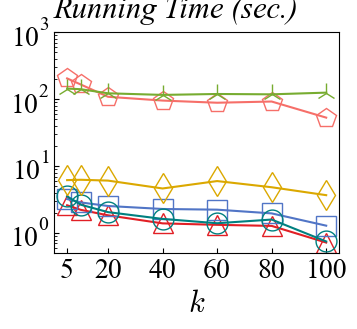

In [128]:
plot_lines(time_k_4ds_arr,
           line_labels=DATASET_LIST,
           x_axis=K_LIST,
           x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Running Time (sec.)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
           y_lim=[0.5, 1000],
           save_path="./figs/time_k_all_datasets.pdf"
           )

In [129]:
settings_default = {"eps":0.1,
                    "prob_mode":"wc",
                    "gamma":0.05,
                    "cand_edge_prob":"orig",
                    "seed_mode":"IM",
                    "k_seed":50,
                    "seed_dist":"uniRAND"}

time_compare_methods = ["SANDWICH", "SUBSIM", "SANDWICHP", "AIS"]
time_k_Epinions_dict = get_runtime_k_of_one_dataset("Epinions", list(range(1, 11)), time_compare_methods, K_LIST, settings_default)
time_k_Epinions_arr = convert_dict_to_arr(time_k_Epinions_dict, time_compare_methods)

time_k_DBLP_dict = get_runtime_k_of_one_dataset("DBLP", list(range(1, 11)), time_compare_methods, K_LIST, settings_default)
time_k_DBLP_arr = convert_dict_to_arr(time_k_DBLP_dict, time_compare_methods)

time_k_orkut_dict = get_runtime_k_of_one_dataset("orkut", list(range(1, 11)), time_compare_methods, K_LIST, settings_default)
time_k_orkut_arr = convert_dict_to_arr(time_k_orkut_dict, time_compare_methods)

time_k_LJ_dict = get_runtime_k_of_one_dataset("LJ", list(range(1, 11)), time_compare_methods, K_LIST, settings_default)
time_k_LJ_arr = convert_dict_to_arr(time_k_LJ_dict, time_compare_methods)

time_k_twitter_dict = get_runtime_k_of_one_dataset("twitter", list(range(1, 11)), time_compare_methods, K_LIST, settings_default)
time_k_twitter_arr = convert_dict_to_arr(time_k_twitter_dict, time_compare_methods)

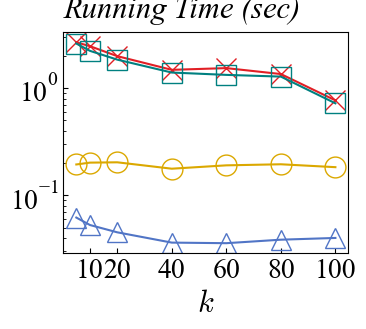

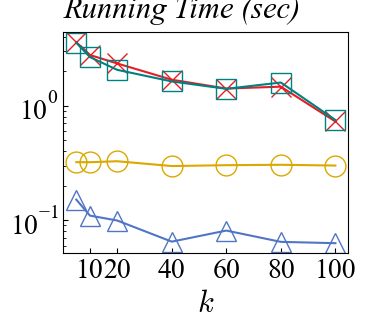

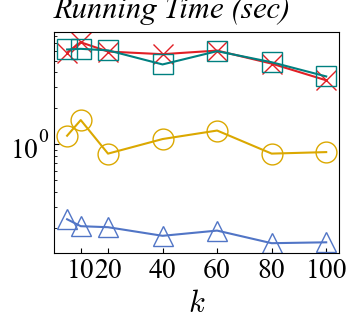

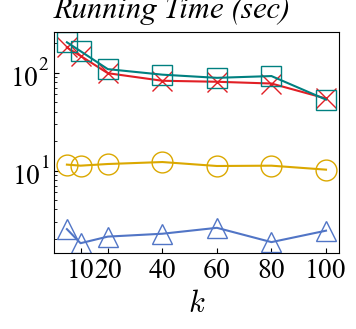

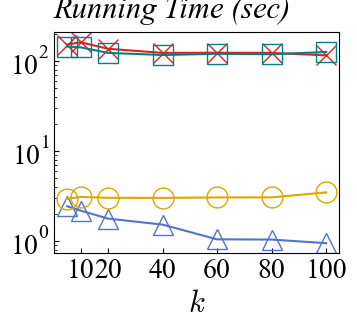

In [130]:
plot_lines(time_k_Epinions_arr,
           line_labels=["SANDWICH", "SUBSIM", "SANDWICHP", "AIS"],
           x_axis=K_LIST,
           x_ticks=K_LIST[1:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Running Time (sec)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
         #   y_lim=[0.1, 10],
           save_path="./figs/time_k_Epinions.pdf"
           )

plot_lines(time_k_DBLP_arr,
           line_labels=["SANDWICH", "SUBSIM", "SANDWICHP", "AIS"],
           x_axis=K_LIST,
           x_ticks=K_LIST[1:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Running Time (sec)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
         #   y_lim=[0.1, 10],
           save_path="./figs/time_k_DBLP.pdf"
           )

plot_lines(time_k_orkut_arr,
           line_labels=["SANDWICH", "SUBSIM", "SANDWICHP", "AIS"],
           x_axis=K_LIST,
           x_ticks=K_LIST[1:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Running Time (sec)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
         #   y_lim=[1, 100],
           save_path="./figs/time_k_orkut.pdf"
           )

plot_lines(time_k_LJ_arr,
           line_labels=["SANDWICH", "SUBSIM", "SANDWICHP", "AIS"],
           x_axis=K_LIST,
           x_ticks=K_LIST[1:],
        #    minor_ticks=False,
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Running Time (sec)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
         #   y_lim=[10, 1000],
           save_path="./figs/time_k_LJ.pdf"
           )

plot_lines(time_k_twitter_arr,
           line_labels=["SANDWICH", "SUBSIM", "SANDWICHP", "AIS"],
           x_axis=K_LIST,
           x_ticks=K_LIST[1:],
        #    minor_ticks=False,
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Running Time (sec)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
         #   y_lim=[10, 1000],
           save_path="./figs/time_k_twitter.pdf"
           )

## Approx. Guarantee

In [131]:
# Approx.: 0.544359
# Time (sec): 1.84
# Sampling Time (sec): 0.820552
# Selection Time (sec): 0.286022
# Estimate Time (sec): 0.465001
# Bound Max Time (sec): 1.37499
# Influence_LB: 34431.5
# Influence_UB: 29889.4
# LB value: 6380.39
# UB value: 8037.88
# Self-estimated LB: 6312.65
# Self-estimated UB: 7914.43
# Self-estimated influence: -1
# #Seeds: 0
# #RR sets: 424960

# Write a function to extract the corresponding value from the file based on the name
def extract_value_from_log(file_path, key):
    # Escape any special regex characters in the key
    escaped_key = re.escape(key)
    # Construct the regex pattern
    pattern = rf"{escaped_key}\s*:\s*([-+]?[0-9]*\.?[0-9]+(?:[eE][-+]?[0-9]+)?)"
    # Search for the pattern in the content
    with open(file_path, 'r') as f:
        content = f.read()
    match = re.search(pattern, content)
    if match:
        # Return the captured group, which is the value
        return float(match.group(1))
    else:
        return None

def comp_ratio(log_fp, origin_inf):
    val_U = extract_value_from_log(log_fp, "UB value") + origin_inf
    origfunc_U = extract_value_from_log(log_fp, "Influence_UB")
    return origfunc_U / val_U

def get_emp_ratio_of_one_dataset(dataset_name:str, rand_seeds, method="SANDWICHP", k_list=K_LIST, settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    eps = settings["eps"] if "eps" in settings.keys() else 0.1
    gamma = settings["gamma"] if "gamma" in settings.keys() else 0.05
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
        
    ratio_rand_seed_list = []
    for rand_seed in rand_seeds:
        s_rand_seed = rand_seed
        ratio_for_one_rand_seed = []

        for k_edges in k_list:
            try:
                path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{method}_k{k_edges}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                origin_inf = get_origin_inf(dataset_name, settings)
                ub_ratio = comp_ratio(path, origin_inf)
                ratio_for_one_rand_seed.append((1-gamma)**2 / (1+gamma)**2 * (1-1/np.e-eps) * ub_ratio)
            except Exception as e:
                print(e)
                print(method, rand_seed, k_edges)
                print(path)
            ratio_rand_seed_list.append(ratio_for_one_rand_seed)
        
    return np.mean(np.array(ratio_rand_seed_list), axis=0)

def combine_ratio_for_datasets(dataset_list, dataset_time_k_dict, target_method="SANDWICH"):
    res = {}
    for dataset_name in dataset_list:
        res[dataset_name] = dataset_time_k_dict[dataset_name][target_method]
    return res

In [132]:
get_emp_ratio_of_one_dataset("Epinions", list(range(1, 11)), settings=settings_default)

array([0.42501612, 0.4171363 , 0.41155714, 0.40423879, 0.40220408,
       0.39807362, 0.39444474])

In [133]:
get_emp_ratio_of_one_dataset("DBLP", list(range(1, 11)), settings=settings_default)

array([0.40041737, 0.3851528 , 0.36117954, 0.32921743, 0.30938235,
       0.29825056, 0.28829263])

In [134]:
ds_ratio_dict = {
    "Epinions": get_emp_ratio_of_one_dataset("Epinions", list(range(1, 11)), settings=settings_default),
    "DBLP": get_emp_ratio_of_one_dataset("DBLP", list(range(1, 11)), settings=settings_default),
    "stanford": get_emp_ratio_of_one_dataset("stanford", list(range(1, 11)), settings=settings_default),
    "orkut": get_emp_ratio_of_one_dataset("orkut", list(range(1, 11)), settings=settings_default),
    "LJ": get_emp_ratio_of_one_dataset("LJ", list(range(1, 11)), settings=settings_default),
    "twitter": get_emp_ratio_of_one_dataset("twitter", list(range(1, 11)), settings=settings_default)
}
ratio_k_4ds_arr = convert_dict_to_arr(ds_ratio_dict, DATASET_LIST)

In [135]:
ratio_k_4ds_arr

array([[0.42501612, 0.4171363 , 0.41155714, 0.40423879, 0.40220408,
        0.39807362, 0.39444474],
       [0.38117172, 0.37981992, 0.37217417, 0.35714235, 0.34992592,
        0.34520134, 0.33993507],
       [0.40041737, 0.3851528 , 0.36117954, 0.32921743, 0.30938235,
        0.29825056, 0.28829263],
       [0.42035192, 0.4267692 , 0.42756153, 0.42581527, 0.42894388,
        0.42952962, 0.42895338],
       [0.40463856, 0.39661647, 0.39005671, 0.37555586, 0.36647733,
        0.35750213, 0.35111679],
       [0.4285756 , 0.42160712, 0.41667515, 0.40891566, 0.40294551,
        0.40126699, 0.40028345]])

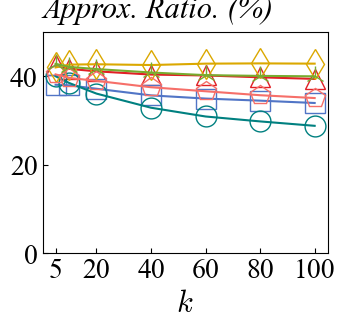

In [136]:
plot_lines(ratio_k_4ds_arr * 100,
           line_labels=DATASET_LIST,
           x_axis=K_LIST,
           x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$k$",
           y_label=r"Approx. Ratio. (%)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[0, 50],
           save_path="./figs/ratio_k_all_datasets.pdf"
           )

# Varying $|S|$
## Inf - $|S|$

In [137]:
# Data process functions
def get_infinc_nS_of_one_dataset(dataset_name:str, rand_seeds, seedsize_list=list(range(10, 51, 10)), baseline_names=["SANDWICH"],
                             settings:dict={"eps":0.1,
                                            "prob_mode":"wc",
                                            "gamma":0.05,
                                            "cand_edge_prob":"orig",
                                            "seed_mode":"IM",
                                            "k_seed":50,
                                            "seed_dist":"uniRAND"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    # k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100

    for baseline in baseline_names:
        inf_diff_rand_seed_list = []
        
        s_eps = format(settings["eps"], '.6f') if "eps" in settings.keys() else "0.100000"
        s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
        for rand_seed in rand_seeds:
            inf_for_one_rand_seed = []
            s_rand_seed = rand_seed
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0
               
            for k_seed in seedsize_list:
                try:
                    path = os.path.join(EVAL_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                    # print(path)
                    new_settings = settings.copy()
                    new_settings["k_seed"] = k_seed
                    inf_for_one_rand_seed.append(get_num_from_file(path) - get_origin_inf(dataset_name, new_settings))
                except:
                    print(baseline, rand_seed, k_edge)
                    print(path)
            inf_diff_rand_seed_list.append(inf_for_one_rand_seed)
        res[baseline] = np.mean(np.array(inf_diff_rand_seed_list), axis=0)
    return res

nS_LIST = list(range(10, 51, 10))

In [138]:
inf_nS_Epinions_dict = get_infinc_nS_of_one_dataset("Epinions", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_nS_Epinions_arr = np.array(list(inf_nS_Epinions_dict.values()))

inf_nS_DBLP_dict = get_infinc_nS_of_one_dataset("DBLP", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_nS_DBLP_arr = np.array(list(inf_nS_DBLP_dict.values()))

inf_nS_stanford_dict = get_infinc_nS_of_one_dataset("stanford", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_nS_stanford_arr = np.array(list(inf_nS_stanford_dict.values()))

inf_nS_orkut_dict = get_infinc_nS_of_one_dataset("orkut", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_nS_orkut_arr = np.array(list(inf_nS_orkut_dict.values()))

inf_nS_LJ_dict = get_infinc_nS_of_one_dataset("LJ", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_nS_LJ_arr = np.array(list(inf_nS_LJ_dict.values()))

inf_nS_twitter_dict = get_infinc_nS_of_one_dataset("twitter", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_nS_twitter_arr = np.array(list(inf_nS_twitter_dict.values()))

In [139]:
inf_nS_twitter_dict

{'SANDWICHP': array([1255798., 1106241., 1046704.,  987164.,  956559.]),
 'SUBSIM': array([255838., 214802., 174147., 176193., 155103.]),
 'AIS': array([663501., 518483., 478403., 465967., 428635.]),
 'OUTDEG': array([245740., 183560., 172020., 152820., 138950.]),
 'PROB': array([ -600.,  -120., -1440.,    30., -1490.]),
 'RAND': array([  979.,  1273., -1371., -3150., -4340.]),
 'SANDWICH': array([1223208., 1085823., 1034645.,  978994.,  939344.])}

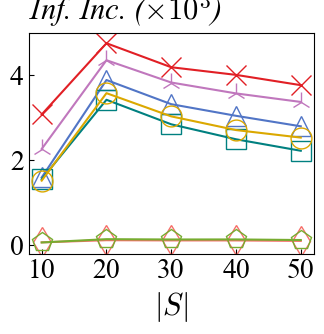

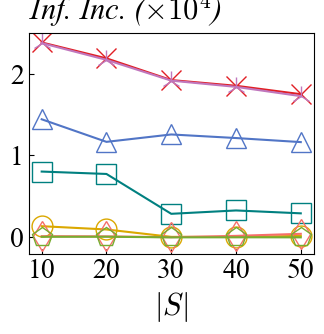

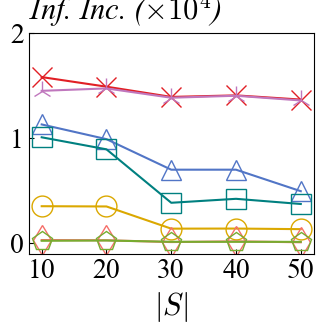

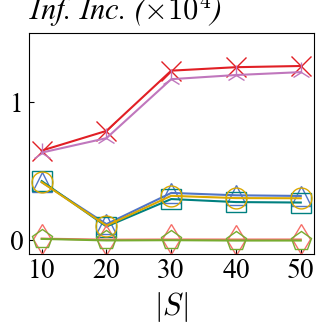

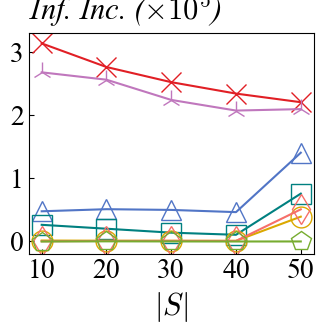

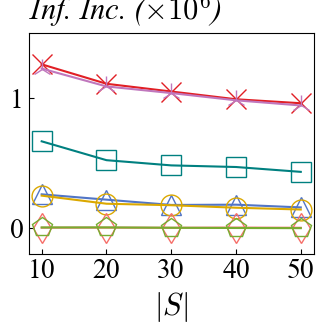

In [140]:
plot_lines(inf_nS_Epinions_arr / 1000,
           line_labels=method_list,
           x_axis=nS_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$|S|$",
           y_label=r"Inf. Inc. ($\times 10^3$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.2, 5],
           save_path="./figs/inf_nS_Epinions.pdf"
           )

plot_lines(inf_nS_DBLP_arr / 10000,
           line_labels=method_list,
           x_axis=nS_LIST,
         #   x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$|S|$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.2, 2.5],
           save_path="./figs/inf_nS_DBLP.pdf"
           )

plot_lines(inf_nS_stanford_arr / 10000,
           line_labels=method_list,
           x_axis=nS_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$|S|$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.1, 2],
           save_path="./figs/inf_nS_stanford.pdf"
           )

plot_lines(inf_nS_LJ_arr / 10000,
           line_labels=method_list,
           x_axis=nS_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$|S|$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.1, 1.5],
           save_path="./figs/inf_nS_LJ.pdf"
           )

plot_lines(inf_nS_orkut_arr / 100000,
           line_labels=method_list,
           x_axis=nS_LIST,
           y_ticks=[0,1,2,3],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$|S|$",
           y_label=r"Inf. Inc. ($\times 10^5$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.2, 3.3],
           save_path="./figs/inf_nS_orkut.pdf"
           )

plot_lines(inf_nS_twitter_arr / 1000000,
           line_labels=method_list,
           x_axis=nS_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$|S|$",
           y_label=r"Inf. Inc. ($\times 10^6$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.2, 1.5],
           save_path="./figs/inf_nS_twitter.pdf"
           )

## Runtime - $|S|$

In [141]:
def get_runtime_nS_lines_of_one_dataset(dataset_name:str, rand_seeds, baseline_names=["SANDWICH"], nS_list=list(range(10, 51, 10)), settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100
        
    for baseline in baseline_names:
        time_diff_rand_seed_list = []
        
        s_eps = format(settings["eps"], '.6f') if "eps" in settings.keys() else "0.100000"
        s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
        for rand_seed in rand_seeds:
            s_rand_seed = rand_seed
            
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0
            
            time_for_one_rand_seed = []
            if baseline == "OUTDEG":
                rand_seed = 0
            for nS in nS_list:
                try:
                    path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{nS}_{seed_dist}_candEdges{cand_edge_prob}")
                    time_for_one_rand_seed.append(read_time_from_file(path))
                except Exception as e:
                    print(e)
                    print(baseline, rand_seed, k_edge)
                    print(path)
                time_diff_rand_seed_list.append(time_for_one_rand_seed)
        res[baseline] = np.mean(np.array(time_diff_rand_seed_list), axis=0)
    return res

In [142]:
# time_k_Epinions_dict = get_runtime_nS_lines_of_one_dataset("Epinions", list(range(1, 11)), method_list, nS_LIST, settings_default)

ds_time_nS_dict = {
    "Epinions": get_runtime_nS_lines_of_one_dataset("Epinions", list(range(1, 11)), method_list, nS_LIST, settings_default),
    "DBLP": get_runtime_nS_lines_of_one_dataset("DBLP", list(range(1, 11)), method_list, nS_LIST, settings_default),
    "stanford": get_runtime_nS_lines_of_one_dataset("stanford", list(range(1, 11)), method_list, nS_LIST, settings_default),
    "orkut": get_runtime_nS_lines_of_one_dataset("orkut", list(range(1, 11)), method_list, nS_LIST, settings_default),
    "LJ": get_runtime_nS_lines_of_one_dataset("LJ", list(range(1, 11)), method_list, nS_LIST, settings_default),
    "twitter": get_runtime_nS_lines_of_one_dataset("twitter", list(range(1, 11)), method_list, nS_LIST, settings_default)
}

time_nS_dict = combine_for_datasets(DATASET_LIST, ds_time_nS_dict)
time_nS_4ds_arr = convert_dict_to_arr(time_nS_dict, DATASET_LIST)

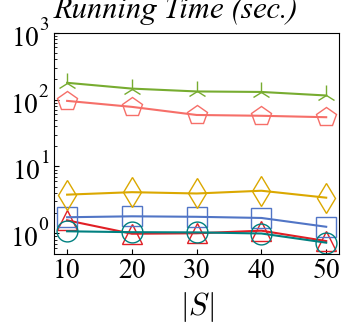

In [143]:
plot_lines(time_nS_4ds_arr,
           line_labels=DATASET_LIST,
           x_axis=nS_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$|S|$",
           y_label=r"Running Time (sec.)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
           y_lim=[0.5, 1000],
           save_path="./figs/time_nS_all_datasets.pdf"
           )

## Approx. Ratio

In [144]:
def get_emp_ratio_nS_of_one_dataset(dataset_name:str, rand_seeds, method="SANDWICH", nS_list=nS_LIST, settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    eps = settings["eps"] if "eps" in settings.keys() else 0.1
    gamma = settings["gamma"] if "gamma" in settings.keys() else 0.05
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100
    ratio_rand_seed_list = []
    for rand_seed in rand_seeds:
        s_rand_seed = rand_seed
        ratio_for_one_rand_seed = []

        for k_seed in nS_list:
            try:
                path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{method}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                new_settings = settings.copy()
                new_settings["k_seed"] = k_seed
                origin_inf = get_origin_inf(dataset_name, new_settings)
                ub_ratio = comp_ratio(path, origin_inf)
                ratio_for_one_rand_seed.append((1-gamma)**2 / (1+gamma)**2 * (1-1/np.e-eps) * ub_ratio)
            except Exception as e:
                print(e)
                print(method, rand_seed, k_seed)
                print(path)
            ratio_rand_seed_list.append(ratio_for_one_rand_seed)
        
    return np.mean(np.array(ratio_rand_seed_list), axis=0)

In [145]:
ds_ratio_nS_dict = {
    "Epinions": get_emp_ratio_nS_of_one_dataset("Epinions", list(range(1, 11)), settings=settings_default),
    "DBLP": get_emp_ratio_nS_of_one_dataset("DBLP", list(range(1, 11)), settings=settings_default),
    "stanford": get_emp_ratio_nS_of_one_dataset("stanford", list(range(1, 11)), settings=settings_default),
    "orkut": get_emp_ratio_nS_of_one_dataset("orkut", list(range(1, 11)), settings=settings_default),
    "LJ": get_emp_ratio_nS_of_one_dataset("LJ", list(range(1, 11)), settings=settings_default),
    "twitter": get_emp_ratio_nS_of_one_dataset("twitter", list(range(1, 11)), settings=settings_default)
}
ratio_nS_4ds_arr = convert_dict_to_arr(ds_ratio_nS_dict, DATASET_LIST)

In [146]:
ratio_nS_4ds_arr

array([[0.3175244 , 0.38034212, 0.39002996, 0.39160144, 0.39470178],
       [0.38215103, 0.38701335, 0.3622875 , 0.37330434, 0.33990942],
       [0.26106119, 0.28580409, 0.26368486, 0.28083375, 0.28829263],
       [0.37421821, 0.40200494, 0.4205732 , 0.42218595, 0.42895338],
       [0.38273498, 0.33922067, 0.34225958, 0.3456223 , 0.35116919],
       [0.32823868, 0.37033841, 0.3869967 , 0.39004533, 0.40028345]])

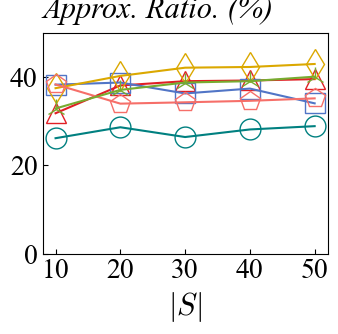

In [147]:
plot_lines(ratio_nS_4ds_arr * 100,
           line_labels=DATASET_LIST,
           x_axis=nS_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$|S|$",
           y_label=r"Approx. Ratio. (%)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[0, 50],
           save_path="./figs/ratio_nS_all_datasets.pdf"
           )

# Varying $\mu$
## Influence - $\mu$

In [148]:
# Data process functions
def get_infinc_mu_of_one_dataset(dataset_name:str, rand_seeds, mu_list=[0.1,0.3,0.5,0.7,0.9], baseline_names=["SANDWICH"],
                             settings:dict={"eps":0.1,
                                            "prob_mode":"wc",
                                            "gamma":0.05,
                                            "cand_edge_prob":"orig",
                                            "seed_mode":"IM",
                                            "k_seed":50,
                                            "seed_dist":"uniRAND"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    # seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100

    for baseline in baseline_names:
        inf_diff_rand_seed_list = []
        
        s_eps = format(settings["eps"], '.6f') if "eps" in settings.keys() else "0.100000"
        s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
        for rand_seed in rand_seeds:
            inf_for_one_rand_seed = []
            s_rand_seed = rand_seed
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0

            for mu in mu_list:
                try:
                    path = os.path.join(EVAL_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_mu{mu}_candEdges{cand_edge_prob}")
                    # print(path)
                    new_settings = settings.copy()
                    new_settings["seed_dist"] = f"mu{mu}"
                    inf_for_one_rand_seed.append(get_num_from_file(path) - get_origin_inf(dataset_name, new_settings))
                except:
                    print(baseline, rand_seed, k_edge)
                    print(path)
            inf_diff_rand_seed_list.append(inf_for_one_rand_seed)
        res[baseline] = np.mean(np.array(inf_diff_rand_seed_list), axis=0)
    return res

MU_LIST = [0.1,0.3,0.5,0.7,0.9]

In [149]:
get_infinc_mu_of_one_dataset("Epinions", list(range(1,11)), baseline_names=method_list, settings=settings_default)

{'SANDWICHP': array([5272.663, 4329.77 , 4491.73 , 2905.81 , 2419.46 ]),
 'SUBSIM': array([2938.939, 1820.87 , 2045.471, 2169.36 , 1619.79 ]),
 'AIS': array([1785.692, 1271.438, 1423.496, 2113.68 , 2281.6  ]),
 'OUTDEG': array([2488.6 , 1639.77, 1669.76, 1980.04, 1519.2 ]),
 'PROB': array([ 65.36,  61.84,  65.67,  99.03, 126.7 ]),
 'RAND': array([ 83.367,  69.998,  82.716, 114.434, 126.81 ]),
 'SANDWICH': array([3482.778, 3199.59 , 3301.014, 2678.73 , 2410.47 ])}

In [150]:

inf_mu_Epinions_dict = get_infinc_mu_of_one_dataset("Epinions", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_mu_Epinions_arr = np.array(list(inf_mu_Epinions_dict.values()))

inf_mu_DBLP_dict = get_infinc_mu_of_one_dataset("DBLP", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_mu_DBLP_arr = np.array(list(inf_mu_DBLP_dict.values()))

inf_mu_stanford_dict = get_infinc_mu_of_one_dataset("stanford", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_mu_stanford_arr = np.array(list(inf_mu_stanford_dict.values()))

inf_mu_orkut_dict = get_infinc_mu_of_one_dataset("orkut", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_mu_orkut_arr = np.array(list(inf_mu_orkut_dict.values()))

inf_mu_LJ_dict = get_infinc_mu_of_one_dataset("LJ", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_mu_LJ_arr = np.array(list(inf_mu_LJ_dict.values()))

inf_mu_twitter_dict = get_infinc_mu_of_one_dataset("twitter", list(range(1,11)), baseline_names=method_list, settings=settings_default)
inf_mu_twitter_arr = np.array(list(inf_mu_twitter_dict.values()))

In [151]:
inf_mu_twitter_dict

{'SANDWICHP': array([1172076.,  996900.,  796599.,  663729.,  613357.]),
 'SUBSIM': array([217579., 157383., 251051., 208059., 231900.]),
 'AIS': array([259846., 432595., 540527., 551317., 597086.]),
 'OUTDEG': array([217300., 131820., 240210., 212030., 239940.]),
 'PROB': array([-1020.,  1860.,  1230.,  2800.,  2660.]),
 'RAND': array([ 314., 2509.,  648., 5410., 5478.]),
 'SANDWICH': array([950598., 947327., 768689., 658937., 615160.])}

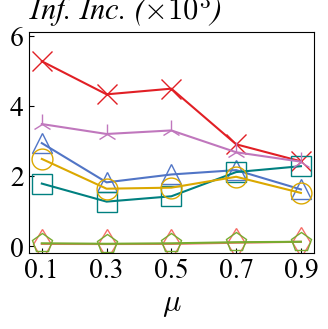

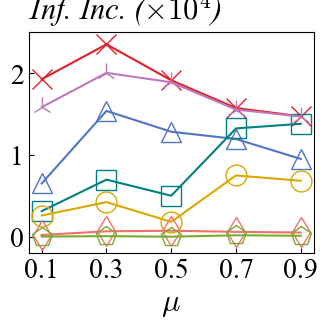

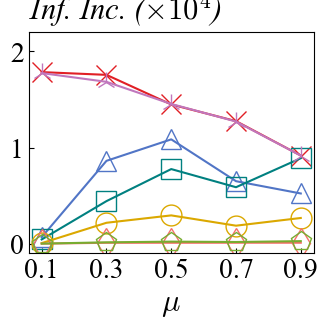

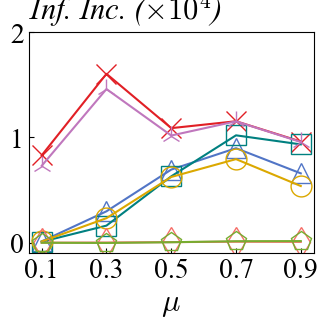

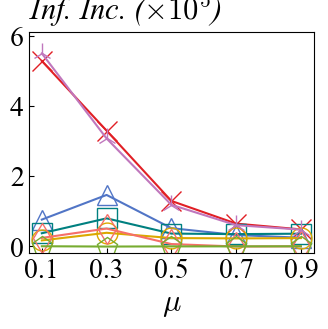

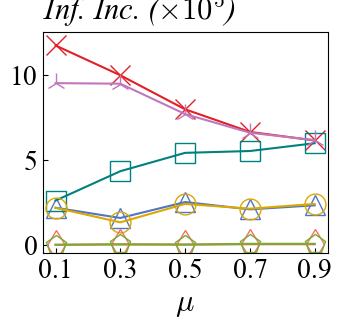

In [152]:
plot_lines(inf_mu_Epinions_arr / 1000,
           line_labels=method_list,
           x_axis=MU_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
          y_ticks=[0,2,4,6],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\mu$",
           y_label=r"Inf. Inc. ($\times 10^3$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.2, 6.1],
           save_path="./figs/inf_mu_Epinions.pdf"
           )

plot_lines(inf_mu_DBLP_arr / 10000,
           line_labels=method_list,
           x_axis=MU_LIST,
         #   x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\mu$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.2, 2.5],
           save_path="./figs/inf_mu_DBLP.pdf"
           )

plot_lines(inf_mu_stanford_arr / 10000,
           line_labels=method_list,
           x_axis=MU_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\mu$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.1, 2.2],
           save_path="./figs/inf_mu_stanford.pdf"
           )

plot_lines(inf_mu_LJ_arr / 10000,
           line_labels=method_list,
           x_axis=MU_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\mu$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.1, 2],
           save_path="./figs/inf_mu_LJ.pdf"
           )

plot_lines(inf_mu_orkut_arr / 100000,
           line_labels=method_list,
           x_axis=MU_LIST,
           y_ticks=[0,2,4,6],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\mu$",
           y_label=r"Inf. Inc. ($\times 10^5$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.2, 6.1],
           save_path="./figs/inf_mu_orkut.pdf"
           )

plot_lines(inf_mu_twitter_arr / 100000,
           line_labels=method_list,
           x_axis=MU_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\mu$",
           y_label=r"Inf. Inc. ($\times 10^5$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0.5, 12.5],
           save_path="./figs/inf_mu_twitter.pdf"
           )

## Runtime - $\mu$

In [153]:
def get_runtime_mu_lines_of_one_dataset(dataset_name:str, rand_seeds, baseline_names=["SANDWICH"], mu_list=[0.1, 0.3, 0.5, 0.7, 0.9], settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    # seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100
        
    for baseline in baseline_names:
        time_diff_rand_seed_list = []
        
        s_eps = format(settings["eps"], '.6f') if "eps" in settings.keys() else "0.100000"
        s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
        for rand_seed in rand_seeds:
            s_rand_seed = rand_seed
            
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0
            time_for_one_rand_seed = []
            if baseline == "OUTDEG":
                rand_seed = 0
            for mu in mu_list:
                try:
                    path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_mu{mu}_candEdges{cand_edge_prob}")
                    time_for_one_rand_seed.append(read_time_from_file(path))
                except Exception as e:
                    print(e)
                    print(baseline, rand_seed, k_edge)
                    print(path)
                time_diff_rand_seed_list.append(time_for_one_rand_seed)
        res[baseline] = np.mean(np.array(time_diff_rand_seed_list), axis=0)
    return res

In [154]:
# time_k_Epinions_dict = get_runtime_mu_lines_of_one_dataset("Epinions", list(range(1, 11)), method_list, MU_LIST, settings_default)
ds_time_mu_dict = {
    "Epinions": get_runtime_mu_lines_of_one_dataset("Epinions", list(range(1, 11)), method_list, MU_LIST, settings_default),
    "DBLP": get_runtime_mu_lines_of_one_dataset("DBLP", list(range(1, 11)), method_list, MU_LIST, settings_default),
    "stanford": get_runtime_mu_lines_of_one_dataset("stanford", list(range(1, 11)), method_list, MU_LIST, settings_default),
    "orkut": get_runtime_mu_lines_of_one_dataset("orkut", list(range(1, 11)), method_list, MU_LIST, settings_default),
    "LJ": get_runtime_mu_lines_of_one_dataset("LJ", list(range(1, 11)), method_list, MU_LIST, settings_default),
    "twitter": get_runtime_mu_lines_of_one_dataset("twitter", list(range(1, 11)), method_list, MU_LIST, settings_default)
}

time_mu_dict = combine_for_datasets(DATASET_LIST, ds_time_mu_dict)
time_mu_4ds_arr = convert_dict_to_arr(time_mu_dict, DATASET_LIST)

In [155]:
time_mu_4ds_arr

array([[  1.4362263,   1.563563 ,   1.517149 ,   1.341079 ,   1.3109384],
       [  3.39648  ,   1.814144 ,   1.935387 ,   1.931852 ,   2.200581 ],
       [  1.683989 ,   1.2341688,   1.1405072,   1.446674 ,   1.385656 ],
       [  3.823301 ,   4.426235 ,   6.492424 ,   7.866916 ,   8.713194 ],
       [186.2623   ,  73.72937  ,  76.98184  ,  72.84684  ,  70.18269  ],
       [267.6686   , 146.7545   , 119.7672   , 101.27925  ,  97.09975  ]])

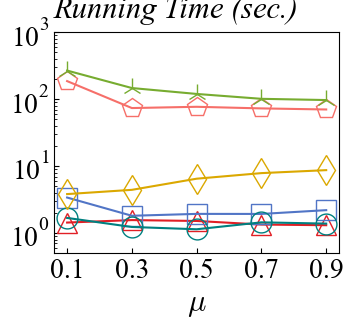

In [156]:
plot_lines(time_mu_4ds_arr,
           line_labels=DATASET_LIST,
           x_axis=MU_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$\mu$",
           y_label=r"Running Time (sec.)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
           y_lim=[0.5, 1000],
           save_path="./figs/time_mu_all_datasets.pdf"
           )

## Approx. Guarantee

In [157]:
def get_emp_ratio_mu_of_one_dataset(dataset_name:str, rand_seeds, method="SANDWICHP", mu_list=[0.1, 0.3, 0.5, 0.7, 0.9], settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    eps = settings["eps"] if "eps" in settings.keys() else 0.1
    gamma = settings["gamma"] if "gamma" in settings.keys() else 0.05
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    # seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100
        
    ratio_rand_seed_list = []
    for rand_seed in rand_seeds:
        s_rand_seed = rand_seed
        ratio_for_one_rand_seed = []

        for mu in mu_list:
            try:
                path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{method}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_mu{mu}_candEdges{cand_edge_prob}")
                new_settings = settings.copy()
                new_settings["seed_dist"] = f"mu{mu}"
                origin_inf = get_origin_inf(dataset_name, new_settings)
                
                ub_ratio = comp_ratio(path, origin_inf)
                ratio_for_one_rand_seed.append((1-gamma)**2 / (1+gamma)**2 * (1-1/np.e-eps) * ub_ratio)
            except Exception as e:
                print(e)
                print(method, rand_seed, k_edge)
                print(path)
            ratio_rand_seed_list.append(ratio_for_one_rand_seed)
        
    return np.mean(np.array(ratio_rand_seed_list), axis=0)

In [158]:
ds_ratio_mu_dict = {
    "Epinions": get_emp_ratio_mu_of_one_dataset("Epinions", list(range(1, 11)), settings=settings_default),
    "DBLP": get_emp_ratio_mu_of_one_dataset("DBLP", list(range(1, 11)), settings=settings_default),
    "stanford": get_emp_ratio_mu_of_one_dataset("stanford", list(range(1, 11)), settings=settings_default),
    "orkut": get_emp_ratio_mu_of_one_dataset("orkut", list(range(1, 11)), settings=settings_default),
    "LJ": get_emp_ratio_mu_of_one_dataset("LJ", list(range(1, 11)), settings=settings_default),
    "twitter": get_emp_ratio_mu_of_one_dataset("twitter", list(range(1, 11)), settings=settings_default)
}
ratio_mu_4ds_arr = convert_dict_to_arr(ds_ratio_mu_dict, DATASET_LIST)

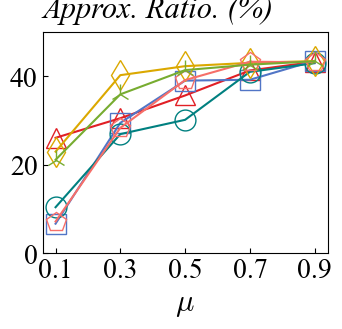

In [159]:
plot_lines(ratio_mu_4ds_arr * 100,
           line_labels=DATASET_LIST,
           x_axis=MU_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$\mu$",
           y_label=r"Approx. Ratio. (%)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[0, 50],
           save_path="./figs/ratio_mu_all_datasets.pdf"
           )

# Varying $\varepsilon$
## Inf - $\varepsilon$

In [160]:
def get_inf_eps_of_one_dataset(dataset_name:str, rand_seeds, eps_list=EPS_LIST, baseline_names=["SANDWICH"],
                             settings:dict={"eps":0.1,
                                            "prob_mode":"wc",
                                            "gamma":0.05,
                                            "cand_edge_prob":"orig",
                                            "seed_mode":"IM",
                                            "k_seed":50,
                                            "k_edge":100,
                                            "seed_dist":"uniRAND"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100

    for baseline in baseline_names:
        inf_diff_rand_seed_list = []
        
        s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
        for rand_seed in rand_seeds:
            inf_for_one_rand_seed = []
            s_rand_seed = rand_seed
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0

            for eps in eps_list:
                s_eps = format(eps, '.6f')
                try:
                    path = os.path.join(EVAL_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                    # print(path)
                    inf_for_one_rand_seed.append(get_num_from_file(path))
                except:
                    print(baseline, rand_seed, k_edge)
                    print(path)
            inf_diff_rand_seed_list.append(inf_for_one_rand_seed)
        res[baseline] = np.mean(np.array(inf_diff_rand_seed_list), axis=0)
    return res

settings_default = {"eps":0.1,
                    "prob_mode":"wc",
                    "gamma":0.05,
                    "cand_edge_prob":"orig",
                    "seed_mode":"IM",
                    "k_seed":50,
                    "seed_dist":"uniRAND"}

In [161]:
inf_eps_epin_dict = get_inf_eps_of_one_dataset("Epinions", list(range(1, 11)), EPS_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_eps_epin_arr = np.array(list(inf_eps_epin_dict.values())) - get_origin_inf("Epinions", settings_default)

inf_eps_DBLP_dict = get_inf_eps_of_one_dataset("DBLP", list(range(1, 11)), EPS_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_eps_DBLP_arr = np.array(list(inf_eps_DBLP_dict.values())) - get_origin_inf("DBLP", settings_default)

inf_eps_stanford_dict = get_inf_eps_of_one_dataset("stanford", list(range(1, 11)), EPS_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_eps_stanford_arr = np.array(list(inf_eps_stanford_dict.values())) - get_origin_inf("stanford", settings_default)

inf_eps_orkut_dict = get_inf_eps_of_one_dataset("orkut", list(range(1, 11)), EPS_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_eps_orkut_arr = np.array(list(inf_eps_orkut_dict.values())) - get_origin_inf("orkut", settings_default)

inf_eps_LJ_dict = get_inf_eps_of_one_dataset("LJ", list(range(1, 11)), EPS_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_eps_LJ_arr = np.array(list(inf_eps_LJ_dict.values())) - get_origin_inf("LJ", settings_default)

inf_eps_twitter_dict = get_inf_eps_of_one_dataset("twitter", list(range(1, 11)), EPS_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_eps_twitter_arr = np.array(list(inf_eps_twitter_dict.values())) - get_origin_inf("twitter", settings_default)

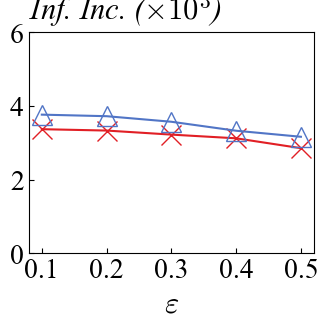

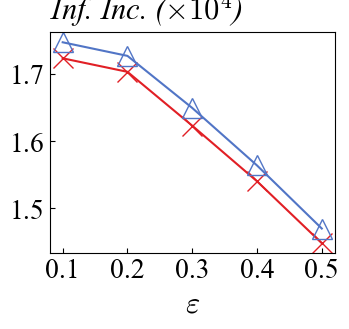

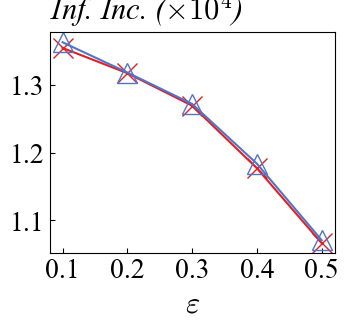

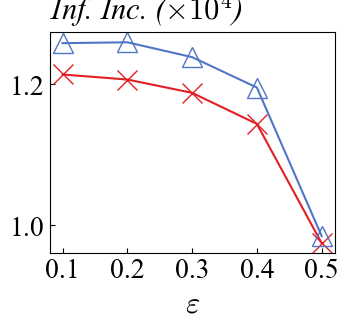

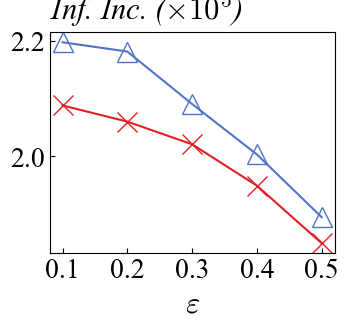

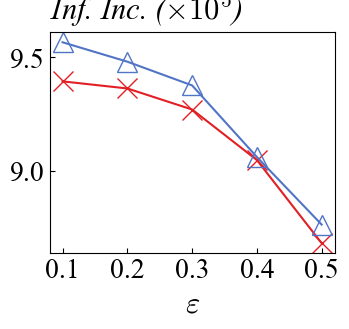

In [162]:
plot_lines(inf_eps_epin_arr / 1000,
           line_labels=method_list,
           x_axis=EPS_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
          y_ticks=[0,2,4,6],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Inf. Inc. ($\times 10^3$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.2, 6.1],
           save_path="./figs/inf_eps_Epinions.pdf"
           )

plot_lines(inf_eps_DBLP_arr / 10000,
           line_labels=method_list,
           x_axis=EPS_LIST,
         #   x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.2, 2.5],
           save_path="./figs/inf_eps_DBLP.pdf"
           )

plot_lines(inf_eps_stanford_arr / 10000,
           line_labels=method_list,
           x_axis=EPS_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.1, 2.2],
           save_path="./figs/inf_eps_stanford.pdf"
           )

plot_lines(inf_eps_LJ_arr / 10000,
           line_labels=method_list,
           x_axis=EPS_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.1, 2],
           save_path="./figs/inf_eps_LJ.pdf"
           )

plot_lines(inf_eps_orkut_arr / 100000,
           line_labels=method_list,
           x_axis=EPS_LIST,
        #    y_ticks=[0,2,4,6],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Inf. Inc. ($\times 10^5$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.2, 6.1],
           save_path="./figs/inf_eps_orkut.pdf"
           )

plot_lines(inf_eps_twitter_arr / 100000,
           line_labels=method_list,
           x_axis=EPS_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Inf. Inc. ($\times 10^5$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.5, 12.5],
           save_path="./figs/inf_eps_twitter.pdf"
           )

In [163]:
our_methods = ["SANDWICH", "SANDWICHP"]
ds_inf_eps_dict = {
    "Epinions": inf_eps_epin_dict,
    "DBLP": inf_eps_DBLP_dict,
    "stanford": inf_eps_stanford_dict,
    "orkut": inf_eps_orkut_dict,
    "LJ": inf_eps_LJ_dict,
    "twitter": inf_eps_twitter_dict
}

inf_eps_dict = combine_for_datasets(DATASET_LIST, ds_inf_eps_dict, "SANDWICHP")
inf_eps_4ds_arr = convert_dict_to_arr(inf_eps_dict, DATASET_LIST)
max_values = np.max(inf_eps_4ds_arr, axis=1, keepdims=True)
inf_eps_4ds_arr = inf_eps_4ds_arr / max_values

In [164]:
inf_eps_4ds_arr


array([[1.        , 0.99614012, 0.98232477, 0.95999773, 0.94500592],
       [1.        , 0.9853751 , 0.9701763 , 0.94126038, 0.90424375],
       [1.        , 0.99557456, 0.97862371, 0.9599133 , 0.93938126],
       [1.        , 0.99802707, 0.98682752, 0.97606756, 0.96268089],
       [0.99976628, 1.        , 0.99603955, 0.98793291, 0.94833742],
       [1.        , 0.99864437, 0.99698639, 0.99198627, 0.98726265]])

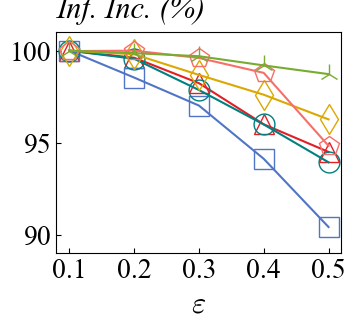

In [165]:
plot_lines(inf_eps_4ds_arr * 100,
           line_labels=DATASET_LIST,
           x_axis=EPS_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Inf. Inc. (%)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_logscale=True,
           y_lim=[89, 101],
           save_path="./figs/inf_eps_all_datasets.pdf"
           )

## Running time - $\varepsilon$

In [166]:
def get_runtime_eps_lines_of_one_dataset(dataset_name:str, rand_seeds, baseline_names=["SANDWICH"], eps_list=EPS_LIST, settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100
        
    for baseline in baseline_names:
        time_diff_rand_seed_list = []
        
        s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
        for rand_seed in rand_seeds:
            s_rand_seed = rand_seed
            
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0
            time_for_one_rand_seed = []
            if baseline == "OUTDEG":
                rand_seed = 0
            for eps in eps_list:
                s_eps = format(eps, '.6f')
                try:
                    path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                    time_for_one_rand_seed.append(read_time_from_file(path))
                except Exception as e:
                    print(e)
                    print(baseline, rand_seed, k_edge)
                    print(path)
                time_diff_rand_seed_list.append(time_for_one_rand_seed)
        res[baseline] = np.mean(np.array(time_diff_rand_seed_list), axis=0)
    return res

In [167]:
our_methods = ["SANDWICH", "SANDWICHP"]
ds_time_eps_dict = {
    "Epinions": get_runtime_eps_lines_of_one_dataset("Epinions", list(range(1, 11)), our_methods, EPS_LIST, settings_default),
    "DBLP": get_runtime_eps_lines_of_one_dataset("DBLP", list(range(1, 11)), our_methods, EPS_LIST, settings_default),
    "stanford": get_runtime_eps_lines_of_one_dataset("stanford", list(range(1, 11)), our_methods, EPS_LIST, settings_default),
    "orkut": get_runtime_eps_lines_of_one_dataset("orkut", list(range(1, 11)), our_methods, EPS_LIST, settings_default),
    "LJ": get_runtime_eps_lines_of_one_dataset("LJ", list(range(1, 11)), our_methods, EPS_LIST, settings_default),
    "twitter": get_runtime_eps_lines_of_one_dataset("twitter", list(range(1, 11)), our_methods, EPS_LIST, settings_default)
}

time_eps_dict = combine_for_datasets(DATASET_LIST, ds_time_eps_dict, "SANDWICHP")
time_eps_4ds_arr = convert_dict_to_arr(time_eps_dict, DATASET_LIST)

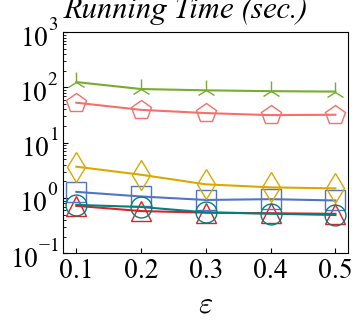

In [168]:
plot_lines(time_eps_4ds_arr,
           line_labels=DATASET_LIST,
           x_axis=EPS_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Running Time (sec.)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
           y_lim=[0.1, 1000],
           save_path="./figs/time_eps_all_datasets.pdf"
           )

In [169]:
time_eps_orkut_dict = get_runtime_eps_lines_of_one_dataset("orkut", list(range(1, 11)), our_methods, EPS_LIST, settings_default)
time_eps_orkut_arr = convert_dict_to_arr(time_eps_orkut_dict, our_methods)

time_eps_LJ_dict = get_runtime_eps_lines_of_one_dataset("LJ", list(range(1, 11)), our_methods, EPS_LIST, settings_default)
time_eps_LJ_arr = convert_dict_to_arr(time_eps_LJ_dict, our_methods)

time_eps_twitter_dict = get_runtime_eps_lines_of_one_dataset("twitter", list(range(1, 11)), our_methods, EPS_LIST, settings_default)
time_eps_twitter_arr = convert_dict_to_arr(time_eps_twitter_dict, our_methods)

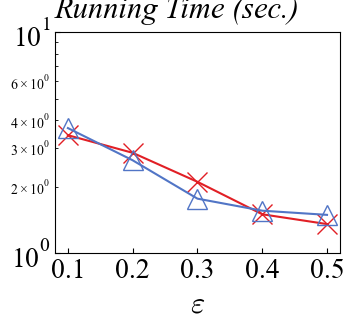

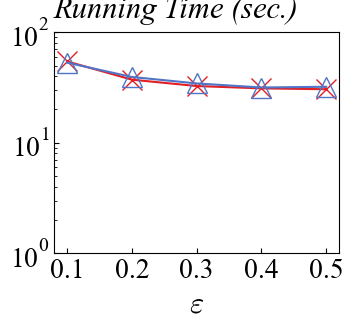

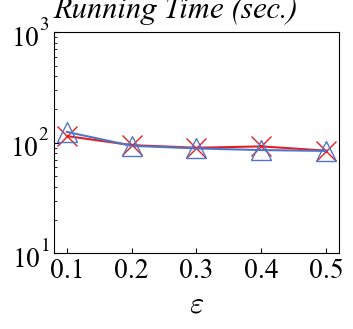

In [170]:
plot_lines(time_eps_orkut_arr,
           line_labels=our_methods,
           x_axis=EPS_LIST,
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Running Time (sec.)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
           y_lim=[1, 10],
           save_path="./figs/time_eps_orkut.pdf"
           )

plot_lines(time_eps_LJ_arr,
           line_labels=our_methods,
           x_axis=EPS_LIST,
        #    minor_ticks=False,
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Running Time (sec.)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
           y_lim=[1, 100],
           save_path="./figs/time_eps_LJ.pdf"
           )

plot_lines(time_eps_twitter_arr,
           line_labels=our_methods,
           x_axis=EPS_LIST,
        #    minor_ticks=False,
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Running Time (sec.)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
           y_lim=[10, 1000],
           save_path="./figs/time_eps_twitter.pdf"
           )

## Ratio - $\varepsilon$

In [171]:
def get_emp_ratio_eps_of_one_dataset(dataset_name:str, rand_seeds, method="SANDWICHP", eps_list=EPS_LIST, settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    eps = settings["eps"] if "eps" in settings.keys() else 0.1
    gamma = settings["gamma"] if "gamma" in settings.keys() else 0.05
    s_gamma = format(gamma, '.6f')
    # s_eps = format(settings["eps"], '.6f')
    
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100
        
    ratio_rand_seed_list = []
    for rand_seed in rand_seeds:
        s_rand_seed = rand_seed
        ratio_for_one_rand_seed = []

        for eps in eps_list:
            s_eps = format(eps, '.6f')
            try:
                path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{method}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                new_settings = settings.copy()
                new_settings["eps"] = eps
                origin_inf = get_origin_inf(dataset_name, new_settings)
                
                ub_ratio = comp_ratio(path, origin_inf)
                ratio_for_one_rand_seed.append((1-gamma)**2 / (1+gamma)**2 * (1-1/np.e-eps) * ub_ratio)
            except Exception as e:
                print(e)
                print(method, rand_seed, k_edge)
                print(path)
            ratio_rand_seed_list.append(ratio_for_one_rand_seed)
        
    return np.mean(np.array(ratio_rand_seed_list), axis=0)

In [172]:
ds_ratio_eps_dict = {
    "Epinions": get_emp_ratio_eps_of_one_dataset("Epinions", list(range(1, 11)), settings=settings_default),
    "DBLP": get_emp_ratio_eps_of_one_dataset("DBLP", list(range(1, 11)), settings=settings_default),
    "stanford": get_emp_ratio_eps_of_one_dataset("stanford", list(range(1, 11)), settings=settings_default),
    "orkut": get_emp_ratio_eps_of_one_dataset("orkut", list(range(1, 11)), settings=settings_default),
    "LJ": get_emp_ratio_eps_of_one_dataset("LJ", list(range(1, 11)), settings=settings_default),
    "twitter": get_emp_ratio_eps_of_one_dataset("twitter", list(range(1, 11)), settings=settings_default)
}
ratio_eps_4ds_arr = convert_dict_to_arr(ds_ratio_eps_dict, DATASET_LIST)

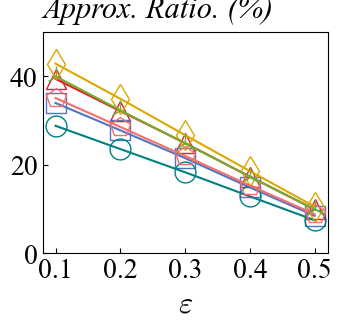

In [173]:
plot_lines(ratio_eps_4ds_arr * 100,
           line_labels=DATASET_LIST,
           x_axis=EPS_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$\varepsilon$",
           y_label=r"Approx. Ratio. (%)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[0, 50],
           save_path="./figs/ratio_eps_all_datasets.pdf"
           )

# Varying $\gamma$
## Inf - $\gamma$

In [174]:
def get_inf_gamma_of_one_dataset(dataset_name:str, rand_seeds, gamma_list=GAMMA_LIST, baseline_names=["SANDWICH"],
                             settings:dict={"eps":0.1,
                                            "prob_mode":"wc",
                                            "gamma":0.05,
                                            "cand_edge_prob":"orig",
                                            "seed_mode":"IM",
                                            "k_seed":50,
                                            "k_edge":100,
                                            "seed_dist":"uniRAND"}):
    res = {}
    s_eps = format(settings["eps"], '.6f')
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100

    for baseline in baseline_names:
        inf_diff_rand_seed_list = []

        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
        for rand_seed in rand_seeds:
            inf_for_one_rand_seed = []
            s_rand_seed = rand_seed
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0

            for gamma in gamma_list:
                s_gamma = format(gamma, '.6f')
                try:
                    path = os.path.join(EVAL_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                    # print(path)
                    inf_for_one_rand_seed.append(get_num_from_file(path))
                except:
                    print(baseline, rand_seed, k_edge)
                    print(path)
            inf_diff_rand_seed_list.append(inf_for_one_rand_seed)
        res[baseline] = np.mean(np.array(inf_diff_rand_seed_list), axis=0)
    return res

settings_default = {"eps":0.1,
                    "prob_mode":"wc",
                    "gamma":0.05,
                    "cand_edge_prob":"orig",
                    "seed_mode":"IM",
                    "k_seed":50,
                    "seed_dist":"uniRAND"}

In [175]:
inf_gamma_epin_dict = get_inf_gamma_of_one_dataset("Epinions", list(range(1, 11)), GAMMA_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_gamma_epin_arr = np.array(list(inf_gamma_epin_dict.values())) - get_origin_inf("Epinions", settings_default)

inf_gamma_DBLP_dict = get_inf_gamma_of_one_dataset("DBLP", list(range(1, 11)), GAMMA_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_gamma_DBLP_arr = np.array(list(inf_gamma_DBLP_dict.values())) - get_origin_inf("DBLP", settings_default)

inf_gamma_stanford_dict = get_inf_gamma_of_one_dataset("stanford", list(range(1, 11)), GAMMA_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_gamma_stanford_arr = np.array(list(inf_gamma_stanford_dict.values())) - get_origin_inf("stanford", settings_default)

inf_gamma_orkut_dict = get_inf_gamma_of_one_dataset("orkut", list(range(1, 11)), GAMMA_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_gamma_orkut_arr = np.array(list(inf_gamma_orkut_dict.values())) - get_origin_inf("orkut", settings_default)

inf_gamma_LJ_dict = get_inf_gamma_of_one_dataset("LJ", list(range(1, 11)), GAMMA_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_gamma_LJ_arr = np.array(list(inf_gamma_LJ_dict.values())) - get_origin_inf("LJ", settings_default)

inf_gamma_twitter_dict = get_inf_gamma_of_one_dataset("twitter", list(range(1, 11)), GAMMA_LIST, ["SANDWICH", "SANDWICHP"], settings_default)
inf_gamma_twitter_arr = np.array(list(inf_gamma_twitter_dict.values())) - get_origin_inf("twitter", settings_default)

In [176]:
inf_gamma_orkut_dict

{'SANDWICH': array([800496.7, 800633.8, 800506.8, 800582.2]),
 'SANDWICHP': array([811434.2, 808606. , 809544.1, 808374.6])}

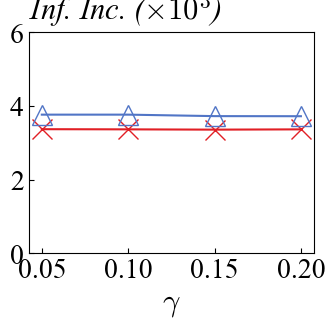

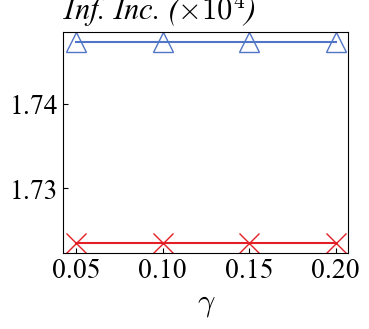

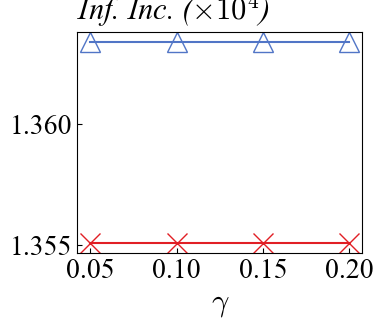

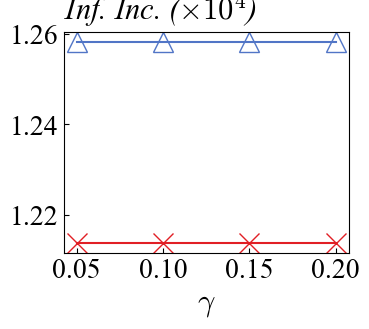

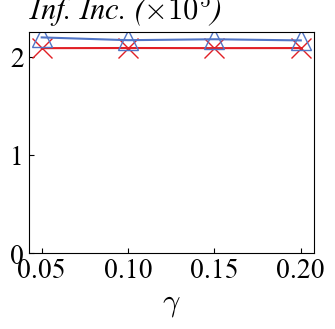

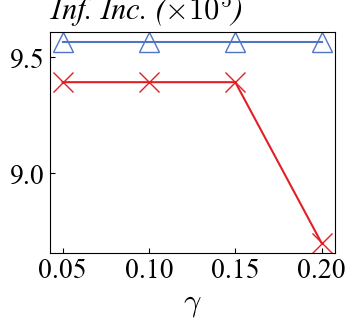

In [177]:
plot_lines(inf_gamma_epin_arr / 1000,
           line_labels=method_list,
           x_axis=GAMMA_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
          y_ticks=[0,2,4,6],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\gamma$",
           y_label=r"Inf. Inc. ($\times 10^3$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.2, 6.1],
           save_path="./figs/inf_gamma_Epinions.pdf"
           )

plot_lines(inf_gamma_DBLP_arr / 10000,
           line_labels=method_list,
           x_axis=GAMMA_LIST,
         #   x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\gamma$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.2, 2.5],
           save_path="./figs/inf_gamma_DBLP.pdf"
           )

plot_lines(inf_gamma_stanford_arr / 10000,
           line_labels=method_list,
           x_axis=GAMMA_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\gamma$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.1, 2.2],
           save_path="./figs/inf_gamma_stanford.pdf"
           )

plot_lines(inf_gamma_LJ_arr / 10000,
           line_labels=method_list,
           x_axis=GAMMA_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\gamma$",
           y_label=r"Inf. Inc. ($\times 10^4$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.1, 2],
           save_path="./figs/inf_gamma_LJ.pdf"
           )

plot_lines(inf_gamma_orkut_arr / 100000,
           line_labels=method_list,
           x_axis=GAMMA_LIST,
        #    y_ticks=[0,2,4,6],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\gamma$",
           y_label=r"Inf. Inc. ($\times 10^5$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-0, 2.25],
           save_path="./figs/inf_gamma_orkut.pdf"
           )

plot_lines(inf_gamma_twitter_arr / 100000,
           line_labels=method_list,
           x_axis=GAMMA_LIST,
          #  x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST,
           color_list=COLOR_LIST,
           x_label=r"$\gamma$",
           y_label=r"Inf. Inc. ($\times 10^5$)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_lim=[-0.5, 12.5],
           save_path="./figs/inf_gamma_twitter.pdf"
           )

In [178]:
our_methods = ["SANDWICH", "SANDWICHP"]
ds_inf_gamma_dict = {
    "Epinions": inf_gamma_epin_dict,
    "DBLP": inf_gamma_DBLP_dict,
    "stanford": inf_gamma_stanford_dict,
    "orkut": inf_gamma_orkut_dict,
    "LJ": inf_gamma_LJ_dict,
    "twitter": inf_gamma_twitter_dict
}

inf_gamma_dict = combine_for_datasets(DATASET_LIST, ds_inf_gamma_dict, "SANDWICHP")
inf_gamma_4ds_arr = convert_dict_to_arr(inf_gamma_dict, DATASET_LIST)
max_values = np.max(inf_gamma_4ds_arr, axis=1, keepdims=True)
inf_gamma_4ds_arr = inf_gamma_4ds_arr / max_values

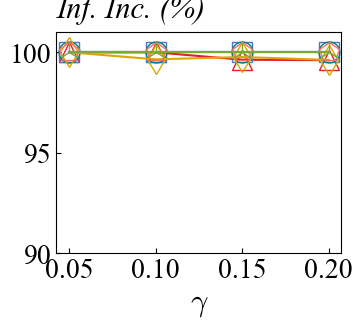

In [179]:
plot_lines(inf_gamma_4ds_arr * 100,
           line_labels=DATASET_LIST,
           x_axis=GAMMA_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$\gamma$",
           y_label=r"Inf. Inc. (%)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
        #    y_logscale=True,
           y_lim=[90, 101],
           save_path="./figs/inf_gamma_all_datasets.pdf"
           )

## Running time - $\gamma$

In [180]:
def get_runtime_gamma_lines_of_one_dataset(dataset_name:str, rand_seeds, baseline_names=["SANDWICH"], gamma_list=GAMMA_LIST, settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    res = {}
    
    s_gamma = format(settings["gamma"], '.6f')
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100
        
    for baseline in baseline_names:
        time_diff_rand_seed_list = []
        
        s_eps = format(settings["eps"], '.6f') if "eps" in settings.keys() else "0.100000"
        # s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
        for rand_seed in rand_seeds:
            s_rand_seed = rand_seed
            
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0
            time_for_one_rand_seed = []
            for gamma in gamma_list:
                s_gamma = format(gamma, '.6f')
                try:
                    path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                    time_for_one_rand_seed.append(read_time_from_file(path))
                except Exception as e:
                    print(e)
                    print(baseline, rand_seed, k_edge)
                    print(path)
                time_diff_rand_seed_list.append(time_for_one_rand_seed)
        res[baseline] = np.mean(np.array(time_diff_rand_seed_list), axis=0)
    return res

In [181]:
our_methods = ["SANDWICH", "SANDWICHP"]
ds_time_gamma_dict = {
    "Epinions": get_runtime_gamma_lines_of_one_dataset("Epinions", list(range(1, 11)), our_methods, GAMMA_LIST, settings_default),
    "DBLP": get_runtime_gamma_lines_of_one_dataset("DBLP", list(range(1, 11)), our_methods, GAMMA_LIST, settings_default),
    "stanford": get_runtime_gamma_lines_of_one_dataset("stanford", list(range(1, 11)), our_methods, GAMMA_LIST, settings_default),
    "orkut": get_runtime_gamma_lines_of_one_dataset("orkut", list(range(1, 11)), our_methods, GAMMA_LIST, settings_default),
    "LJ": get_runtime_gamma_lines_of_one_dataset("LJ", list(range(1, 11)), our_methods, GAMMA_LIST, settings_default),
    "twitter": get_runtime_gamma_lines_of_one_dataset("twitter", list(range(1, 11)), our_methods, GAMMA_LIST, settings_default)
}

time_gamma_dict = combine_for_datasets(DATASET_LIST, ds_time_gamma_dict, "SANDWICHP")
time_gamma_4ds_arr = convert_dict_to_arr(time_gamma_dict, DATASET_LIST)

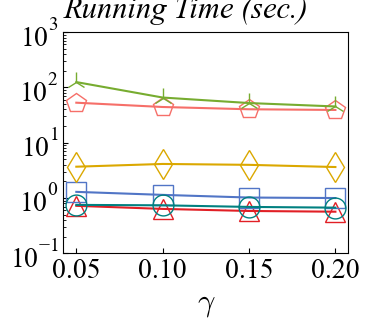

In [182]:
plot_lines(time_gamma_4ds_arr,
           line_labels=DATASET_LIST,
           x_axis=GAMMA_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$\gamma$",
           y_label=r"Running Time (sec.)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_logscale=True,
           y_lim=[0.1, 1000],
           save_path="./figs/time_gamma_all_datasets.pdf"
           )

## Ratio - $\gamma$

In [183]:
def get_emp_ratio_gamma_of_one_dataset(dataset_name:str, rand_seeds, method="SANDWICHP", gamma_list=GAMMA_LIST, settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    eps = settings["eps"] if "eps" in settings.keys() else 0.1
    gamma = settings["gamma"] if "gamma" in settings.keys() else 0.05
    s_eps = format(settings["eps"], '.6f')
    
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100
        
    ratio_rand_seed_list = []
    for rand_seed in rand_seeds:
        s_rand_seed = rand_seed
        ratio_for_one_rand_seed = []

        for gamma in gamma_list:
            s_gamma = format(gamma, '.6f')
            try:
                path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{method}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                new_settings = settings.copy()
                new_settings["gamma"] = gamma
                origin_inf = get_origin_inf(dataset_name, new_settings)
                
                ub_ratio = comp_ratio(path, origin_inf)
                ratio_for_one_rand_seed.append((1-gamma)**2 / (1+gamma)**2 * (1-1/np.e-eps) * ub_ratio)
            except Exception as e:
                print(e)
                print(method, rand_seed, k_edge)
                print(path)
            ratio_rand_seed_list.append(ratio_for_one_rand_seed)
        
    return np.mean(np.array(ratio_rand_seed_list), axis=0)

In [184]:
ds_ratio_gamma_dict = {
    "Epinions": get_emp_ratio_gamma_of_one_dataset("Epinions", list(range(1, 11)), settings=settings_default),
    "DBLP": get_emp_ratio_gamma_of_one_dataset("DBLP", list(range(1, 11)), settings=settings_default),
    "stanford": get_emp_ratio_gamma_of_one_dataset("stanford", list(range(1, 11)), settings=settings_default),
    "orkut": get_emp_ratio_gamma_of_one_dataset("orkut", list(range(1, 11)), settings=settings_default),
    "LJ": get_emp_ratio_gamma_of_one_dataset("LJ", list(range(1, 11)), settings=settings_default),
    "twitter": get_emp_ratio_gamma_of_one_dataset("twitter", list(range(1, 11)), settings=settings_default)
}
ratio_gamma_4ds_arr = convert_dict_to_arr(ds_ratio_gamma_dict, DATASET_LIST)

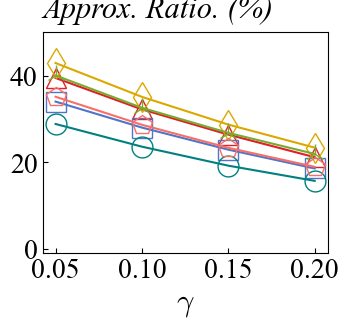

In [185]:
plot_lines(ratio_gamma_4ds_arr * 100,
           line_labels=DATASET_LIST,
           x_axis=GAMMA_LIST,
        #    x_ticks=[K_LIST[0]] + K_LIST[2:],
           ms=MARKER_SIZE,
           marker_list=MARKERS_LIST[1:],
           color_list=COLOR_LIST,
           x_label=r"$\gamma$",
           y_label=r"Approx. Ratio. (%)",
           tick_size=TICK_SIZE,
           label_size=LABEL_SIZE,
           fig_size=FIG_SIZE,
           y_label_pos=Y_LABEL_POS,
           y_lim=[-1, 50],
           save_path="./figs/ratio_gamma_all_datasets.pdf"
           )

# Overall Runtime

In [186]:
def get_runtime_one_dataset(dataset_name:str, rand_seeds, baseline_names=["SANDWICH"], settings:dict={"eps":0.1, "seed_mode":"RAND"}):
    res = {}
    
    prob_mode = settings["prob_mode"] if "prob_mode" in settings.keys() else "wc"
    seed_mode = settings["seed_mode"] if "seed_mode" in settings.keys() else "IM"
    seed_dist = settings["seed_dist"] if "seed_dist" in settings.keys() else "uniRAND"
    cand_edge_prob = settings["cand_edge_prob"] if "cand_edge_prob" in settings.keys() else "orig"
    k_seed = settings["k_seed"] if "k_seed" in settings.keys() else 50
    k_edge = settings["k_edge"] if "k_edge" in settings.keys() else 100
        
    for baseline in baseline_names:
        time_diff_rand_seed_list = []
        
        s_eps = format(settings["eps"], '.6f') if "eps" in settings.keys() else "0.100000"
        s_gamma = format(settings["gamma"], '.6f') if "gamma" in settings.keys() else "0.050000"
        if baseline == "SUBSIM":
            s_gamma = "0.000000"
        if baseline in ["PROB", "AIS", "OUTDEG", "RAND"]:
            s_eps = "0.000000"
            if baseline == "AIS":
                s_gamma = format(settings["gamma"], '.6f')
            else:
                s_gamma = "0.000000"
                
        for rand_seed in rand_seeds:
            s_rand_seed = rand_seed
            
            if baseline == "PROB" or baseline == "OUTDEG":
                s_rand_seed = 0
            time_for_one_rand_seed = []
            for time_str in ["Bound Max Time (sec)", "Estimate Time (sec)", "Time (sec)"]:
                try:
                    path = os.path.join(LOG_DIR, f"{dataset_name}_{s_rand_seed}_{baseline}_k{k_edge}_{s_eps}_gamma{s_gamma}_{prob_mode}_seeds{seed_mode}{k_seed}_{seed_dist}_candEdges{cand_edge_prob}")
                    time_for_one_rand_seed.append(extract_value_from_log(path, time_str))
                except Exception as e:
                    print(e)
                    print(baseline, rand_seed, k_edge)
                    print(path)
            time_diff_rand_seed_list.append(time_for_one_rand_seed)
        res[baseline] = np.mean(np.array(time_diff_rand_seed_list), axis=0)
    return res

In [187]:
ds_names = ["Epinions", "DBLP", "stanford", "orkut", "LJ", "twitter"]
for ds in ds_names:
    cur_dict = get_runtime_one_dataset(ds, list(range(1,11)),baseline_names=method_list, settings=settings_default)
    # cur_dict["SANDWICH"][-1] = cur_dict["SANDWICH"][-1] - (cur_dict["SANDWICH"][0] + cur_dict["SANDWICH"][1])
    # cur_dict["SANDWICHP"][-1] = cur_dict["SANDWICHP"][-1] - (cur_dict["SANDWICHP"][0] + cur_dict["SANDWICHP"][1])
    cur_dict["SANDWICH"][-1] = (cur_dict["SANDWICH"][0] + cur_dict["SANDWICH"][1])
    print(ds, cur_dict["SANDWICH"], cur_dict["SANDWICHP"])

Epinions [0.4421489 0.3293034 0.7714523] [0.3994452 0.3170353 0.7215269]
DBLP [0.4627321 0.2666879 0.72942  ] [0.4584428 0.2756257 0.7499224]
stanford [0.6584505 0.6010274 1.2594779] [0.6757568 0.6010562 1.290681 ]
orkut [2.838121  0.5890126 3.4271336] [2.783321 0.580108 3.684012]
LJ [30.9357  23.52611 54.46181] [28.86402 23.82254 53.04453]
twitter [ 36.8841   78.03301 114.91711] [ 33.68199  78.45892 125.2968 ]


# Color test

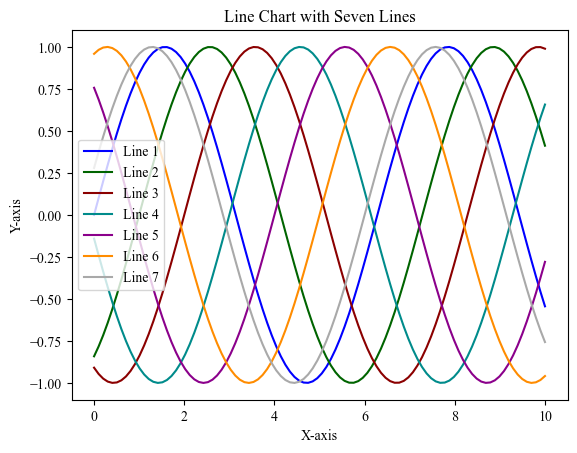

In [188]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.sin(x - 1)
y3 = np.sin(x - 2)
y4 = np.sin(x - 3)
y5 = np.sin(x - 4)
y6 = np.sin(x - 5)
y7 = np.sin(x - 6)

# Plot the lines with the chosen color combination
plt.plot(x, y1, label='Line 1', color='#0000FF')
plt.plot(x, y2, label='Line 2', color='#006400')
plt.plot(x, y3, label='Line 3', color='#8B0000')
plt.plot(x, y4, label='Line 4', color='#008B8B')
plt.plot(x, y5, label='Line 5', color='#8B008B')
plt.plot(x, y6, label='Line 6', color='#FF8C00')
plt.plot(x, y7, label='Line 7', color='#A9A9A9')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Chart with Seven Lines')
plt.legend()

# Show the plot
plt.show()
